### WorkFlow 1
Here are the steps in this workflow:
- Preprocessing the data and getting it ready to work on after merging the two datasets.
- Exploring the data using EDA, done in assignment-1 and here too
- Choosing and Training a model based on EDA(gaussian naive bayes)
- Visualizing the model output and diagnosing failure.
- Gaining knowledge from the model output visualizations.
- Transforming the data via feature engineering(via common sense and model insights)
- Performing EDA on new features.
- Training a second model(xgboost)
- Visualizing the model output and diagnosing failure.
- Gaining knowledge from the model output visualizations.
- Repeat the above any number of times, we stop at two iterations.



### ITERATION1


### Exploratory Data Analysis Viz

Index(['MonthlyDebtPayments', 'LoanAmount', 'NetWorth', 'CreditScore',
       'CheckingAccountBalance', 'BankruptcyHistory', 'LoanDuration',
       'EducationLevel', 'UtilityBillsPaymentHistory', 'TotalLiabilities',
       'MaritalStatus', 'LengthOfCreditHistory', 'AnnualIncome',
       'HomeOwnershipStatus', 'PreviousLoanDefaults',
       'CreditCardUtilizationRate', 'PaymentHistory', 'TotalAssets',
       'EmploymentStatus', 'SavingsAccountBalance', 'Age',
       'NumberOfCreditInquiries', 'JobTenure', 'DebtToIncomeRatio',
       'LoanApproved', 'NumberOfOpenCreditLines', 'LoanPurpose',
       'InterestRate', 'NumberOfDependents'],
      dtype='object')
['LoanPurpose', 'EducationLevel', 'EmploymentStatus', 'Age', 'MaritalStatus', 'AnnualIncome', 'NumberOfDependents', 'LoanApproved', 'DebtToIncomeRatio', 'CreditScore']


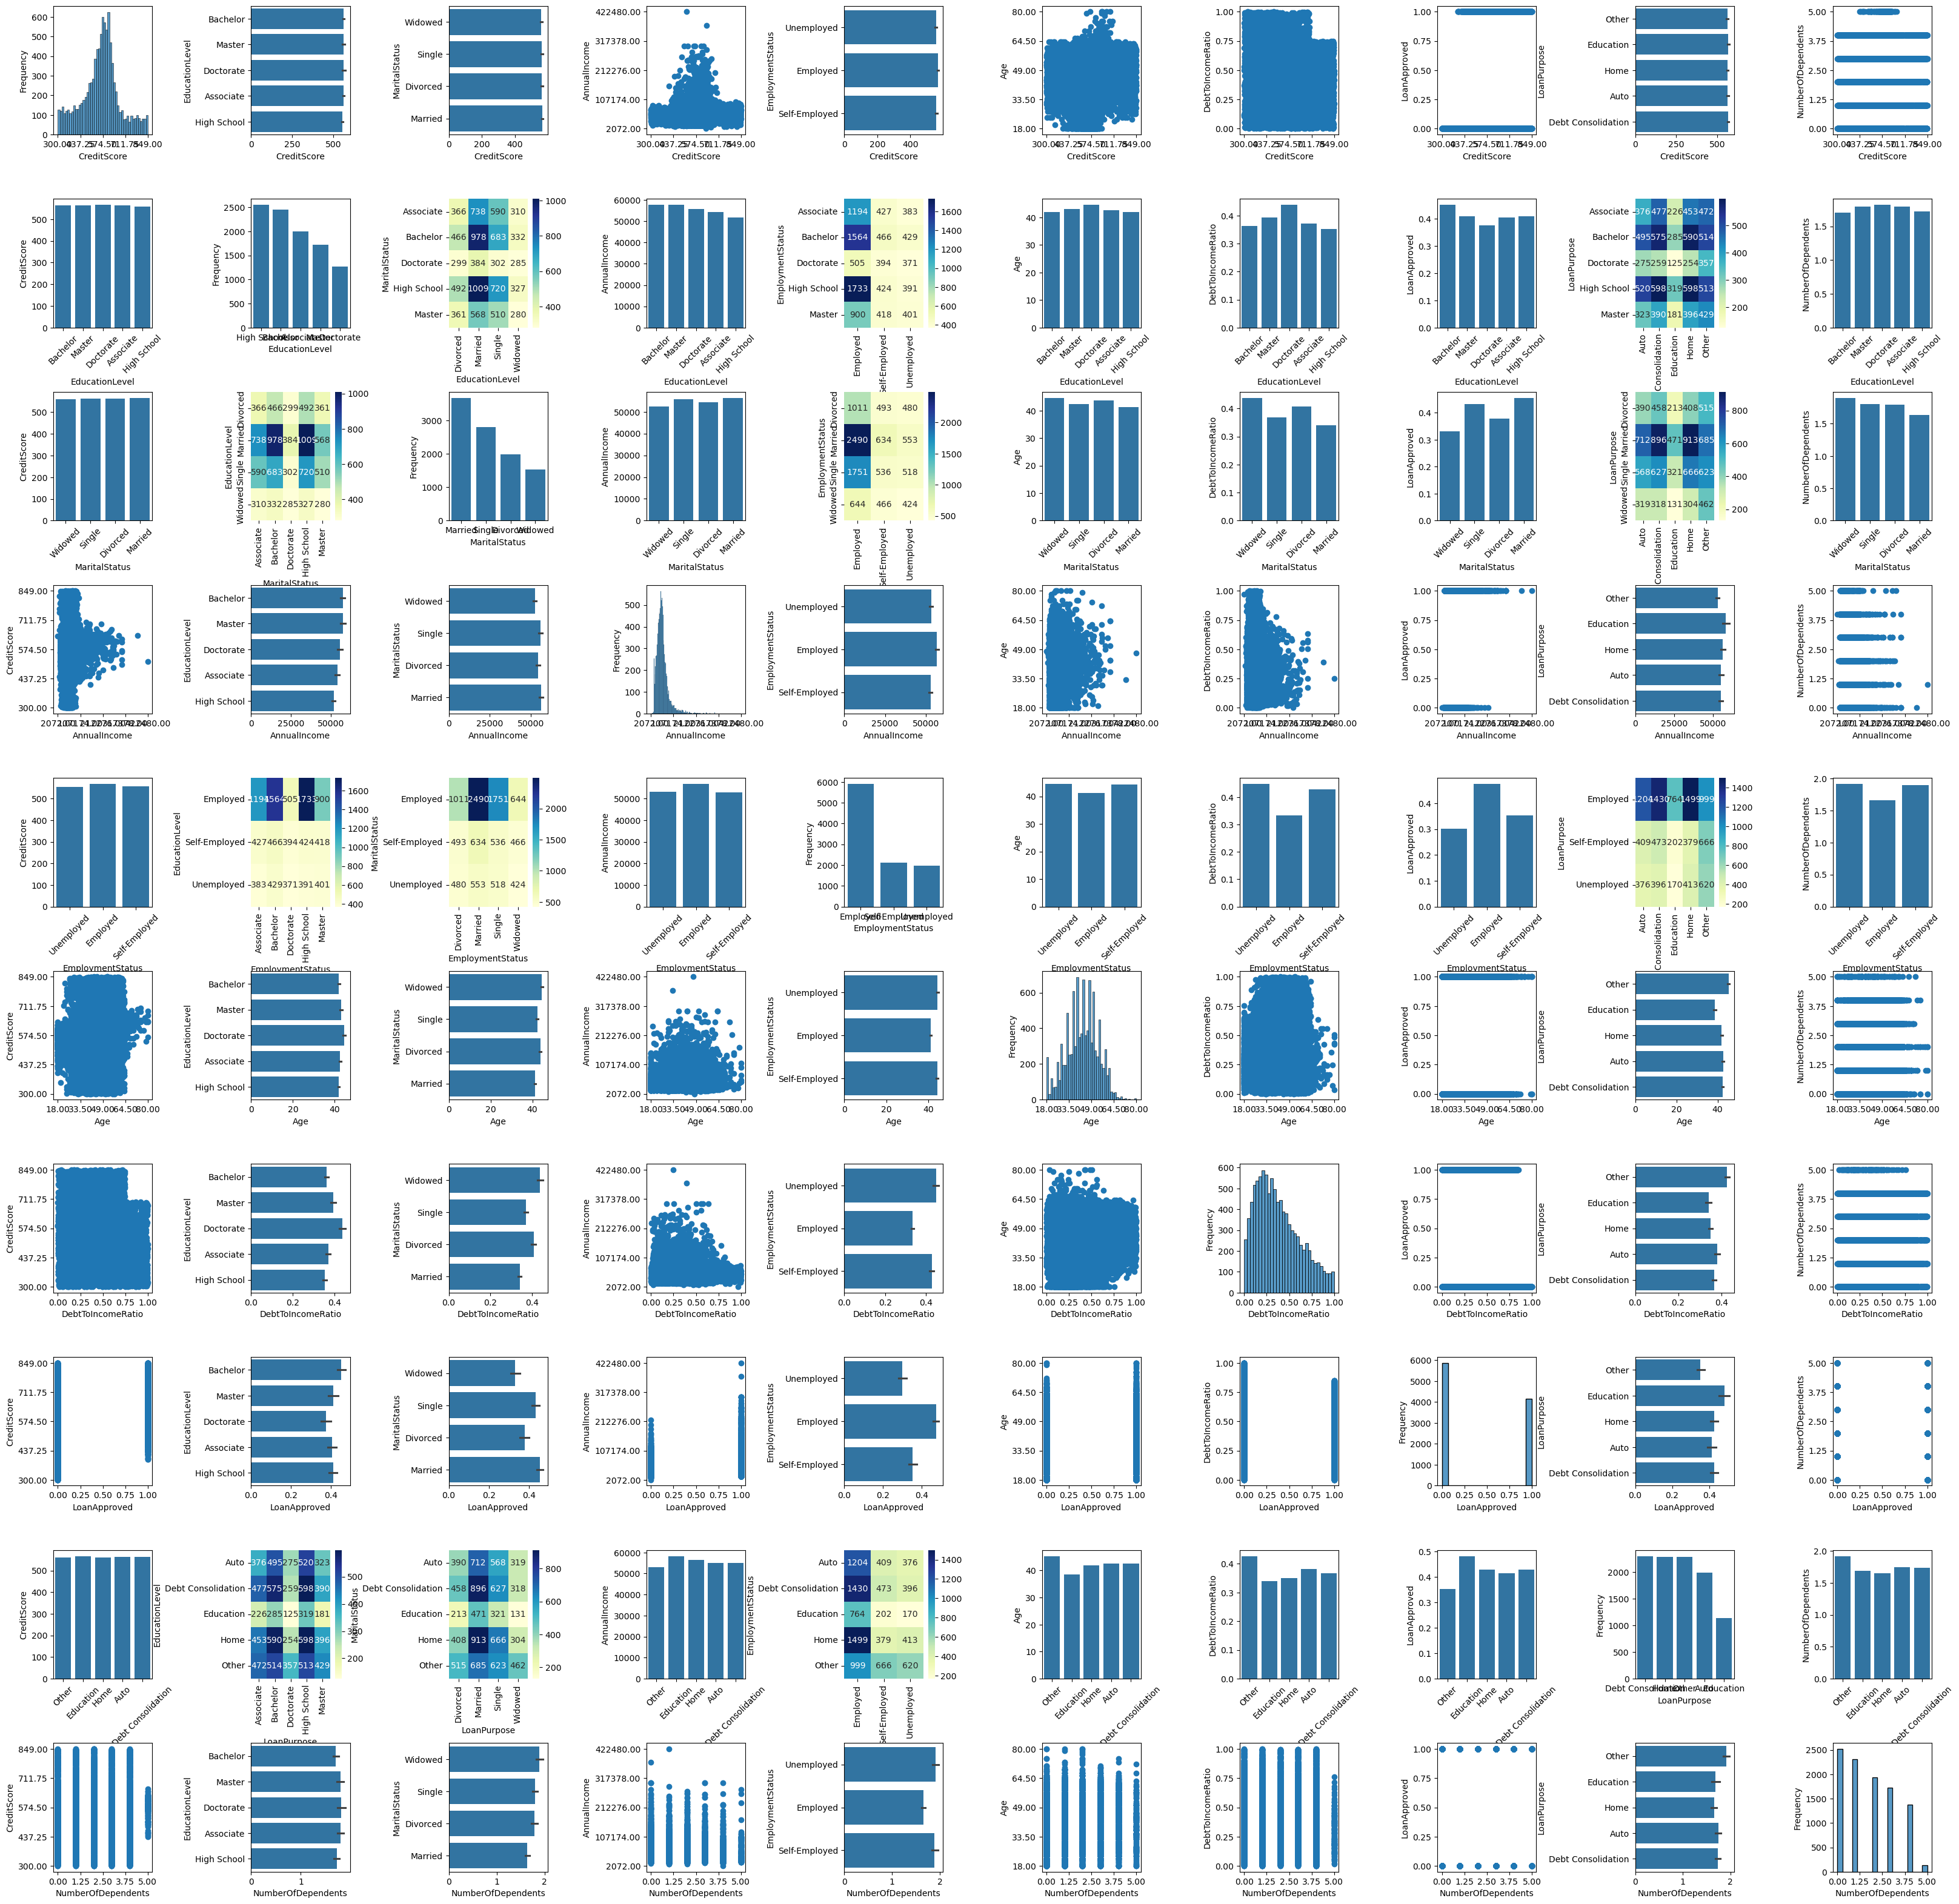

In [10]:
# EDA
# gplom
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

base_df = pd.read_csv('../data/base.csv')
print(base_df.columns)

cols_to_use1 = ['LoanPurpose', 'EducationLevel', 'EmploymentStatus', 'Age', 'MaritalStatus', 'AnnualIncome', 'NumberOfDependents', 'LoanApproved', 'DebtToIncomeRatio', 'CreditScore']
print(cols_to_use1)
col_types = [base_df[col].dtype for col in cols_to_use1]
cols_not_used1 = [col for col in base_df.columns if col not in cols_to_use1]
# print(col_types)

viz1_df = base_df.drop(columns=cols_not_used1)

# print(viz1_df.columns)
def special_plot(x, y, ax, plot_type='scatter', xname='a', yname='b'):
    # Plot scatter plot if both x and y are continuous
    if plot_type == 'scatter':
        ax.scatter(x, y)
        ax.set_xlabel(xname)
        ax.set_ylabel(yname)

        # Set axis ticks based on the values of x and y
        ax.set_xticks(np.linspace(min(x), max(x), num=5))  # Set x-ticks evenly spaced
        ax.set_yticks(np.linspace(min(y), max(y), num=5))  # Set y-ticks evenly spaced
        
        # Set tick labels
        ax.set_xticklabels([f'{tick:.2f}' for tick in np.linspace(min(x), max(x), num=5)])
        ax.set_yticklabels([f'{tick:.2f}' for tick in np.linspace(min(y), max(y), num=5)])

    # Plot bar plot for continuous vs categorical or categorical vs continuous
    elif plot_type == 'bar':
        if x.dtype == 'object':  # Categorical data on x-axis
            # y can't be just y, y needs to have the mean age for each category
            sum_dict = {} # maps a category to an age
            count_dict = {}
            uniq  = []
            for el in x:
                sum_dict[el] = 0
                count_dict[el] = 0
                if el not in uniq:
                    uniq.append(el)
            for i in range(len(x)):
                el = x[i]
                sum_dict[el] += y[i]
                count_dict[el] += 1
            
            y=[]
            for el in uniq:
                y.append(sum_dict[el]/count_dict[el])

            sns.barplot(x=uniq, y=y, ax=ax)
            ax.set_xlabel(xname)
            ax.set_ylabel(yname)
            
            # Set x-ticks and labels for categorical x-axis
            ax.set_xticks(np.arange(len(x.unique())))
            ax.set_xticklabels(x.unique(), rotation=45)
        
        else:  # Continuous data on x-axis
            sns.barplot(x=x, y=y, ax=ax) # do the swap
            ax.set_xlabel(xname)
            ax.set_ylabel(yname)
        

    # Plot heatmap for categorical vs categorical (contingency table)
    elif plot_type == 'heatmap':
        contingency = pd.crosstab(x, y)
        sns.heatmap(contingency, annot=True, cmap="YlGnBu", fmt='d', ax=ax)
        ax.set_xlabel(xname)
        ax.set_ylabel(yname)

    # Plot histogram for same var twice
    elif plot_type == 'histogram1':
        sns.histplot(x, ax=ax)
        ax.set_xlabel(xname)
        ax.set_ylabel("Frequency")

        # Set the ticks for the histogram
        ax.set_xticks(np.linspace(min(x), max(x), num=5))  # Set x-ticks evenly spaced
        ax.set_xticklabels([f'{tick:.2f}' for tick in np.linspace(min(x), max(x), num=5)])
    
    elif plot_type == 'bar1':
        category_counts = x.value_counts()

        # Create the bar plot with category counts
        sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
        
        # Set labels for the axes
        ax.set_xlabel(xname)
        ax.set_ylabel("Frequency")
        
        # Optionally, format the tick labels on x-axis (if needed)


# Create a large plot
fig, axes = plt.subplots(len(viz1_df.columns), len(viz1_df.columns), figsize=(40, 40))

# Loop through the columns of the dataframe
for i in range(len(viz1_df.columns)):
    for j in range(len(viz1_df.columns)):
        ax = axes[i, j]
        x = viz1_df[viz1_df.columns[i]]
        y = viz1_df[viz1_df.columns[j]]

        if i == j:
            # Diagonal: plot distribution (histogram for continuous, bar plot for categorical)
            if (x.dtype == 'object'):  # Categorical column
                special_plot(x, y, ax, plot_type='bar1', xname=viz1_df.columns[i], yname='Frequency')
            else:  # Continuous column
                special_plot(x, y, ax, plot_type='histogram1', xname=viz1_df.columns[i], yname='Frequency')
        else:
            # Non-diagonal: use special plot function
            if (x.dtype == 'object') and (y.dtype == 'object'):
                special_plot(x, y, ax, plot_type='heatmap', xname=viz1_df.columns[i], yname=viz1_df.columns[j])
            elif (x.dtype == 'object') or (y.dtype == 'object'):
                special_plot(x, y, ax, plot_type='bar', xname=viz1_df.columns[i], yname=viz1_df.columns[j])
            else:
                special_plot(x, y, ax, plot_type='scatter', xname=viz1_df.columns[i], yname=viz1_df.columns[j])

# Adjust the layout to make it readable
plt.subplots_adjust(wspace=1, hspace=0.5)
plt.show()


The above pair plot shows that no two variables are correlated. It isn't the case that if one variable increases then so does another.
But we also see that most variables are somewhat normally distributed from the univariate plots(along the diagonal).

Index(['MonthlyDebtPayments', 'LoanAmount', 'NetWorth', 'CreditScore',
       'CheckingAccountBalance', 'BankruptcyHistory', 'LoanDuration',
       'EducationLevel', 'UtilityBillsPaymentHistory', 'TotalLiabilities',
       'MaritalStatus', 'LengthOfCreditHistory', 'AnnualIncome',
       'HomeOwnershipStatus', 'PreviousLoanDefaults',
       'CreditCardUtilizationRate', 'PaymentHistory', 'TotalAssets',
       'EmploymentStatus', 'SavingsAccountBalance', 'Age',
       'NumberOfCreditInquiries', 'JobTenure', 'DebtToIncomeRatio',
       'LoanApproved', 'NumberOfOpenCreditLines', 'LoanPurpose',
       'InterestRate', 'NumberOfDependents'],
      dtype='object')


/tmp/ipykernel_430500/821963986.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = viz1_df.groupby(['binned', 'LoanApproved']).size().unstack(fill_value=0)
/tmp/ipykernel_430500/821963986.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = viz1_df.groupby(['binned', 'LoanApproved']).size().unstack(fill_value=0)
/tmp/ipykernel_430500/821963986.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

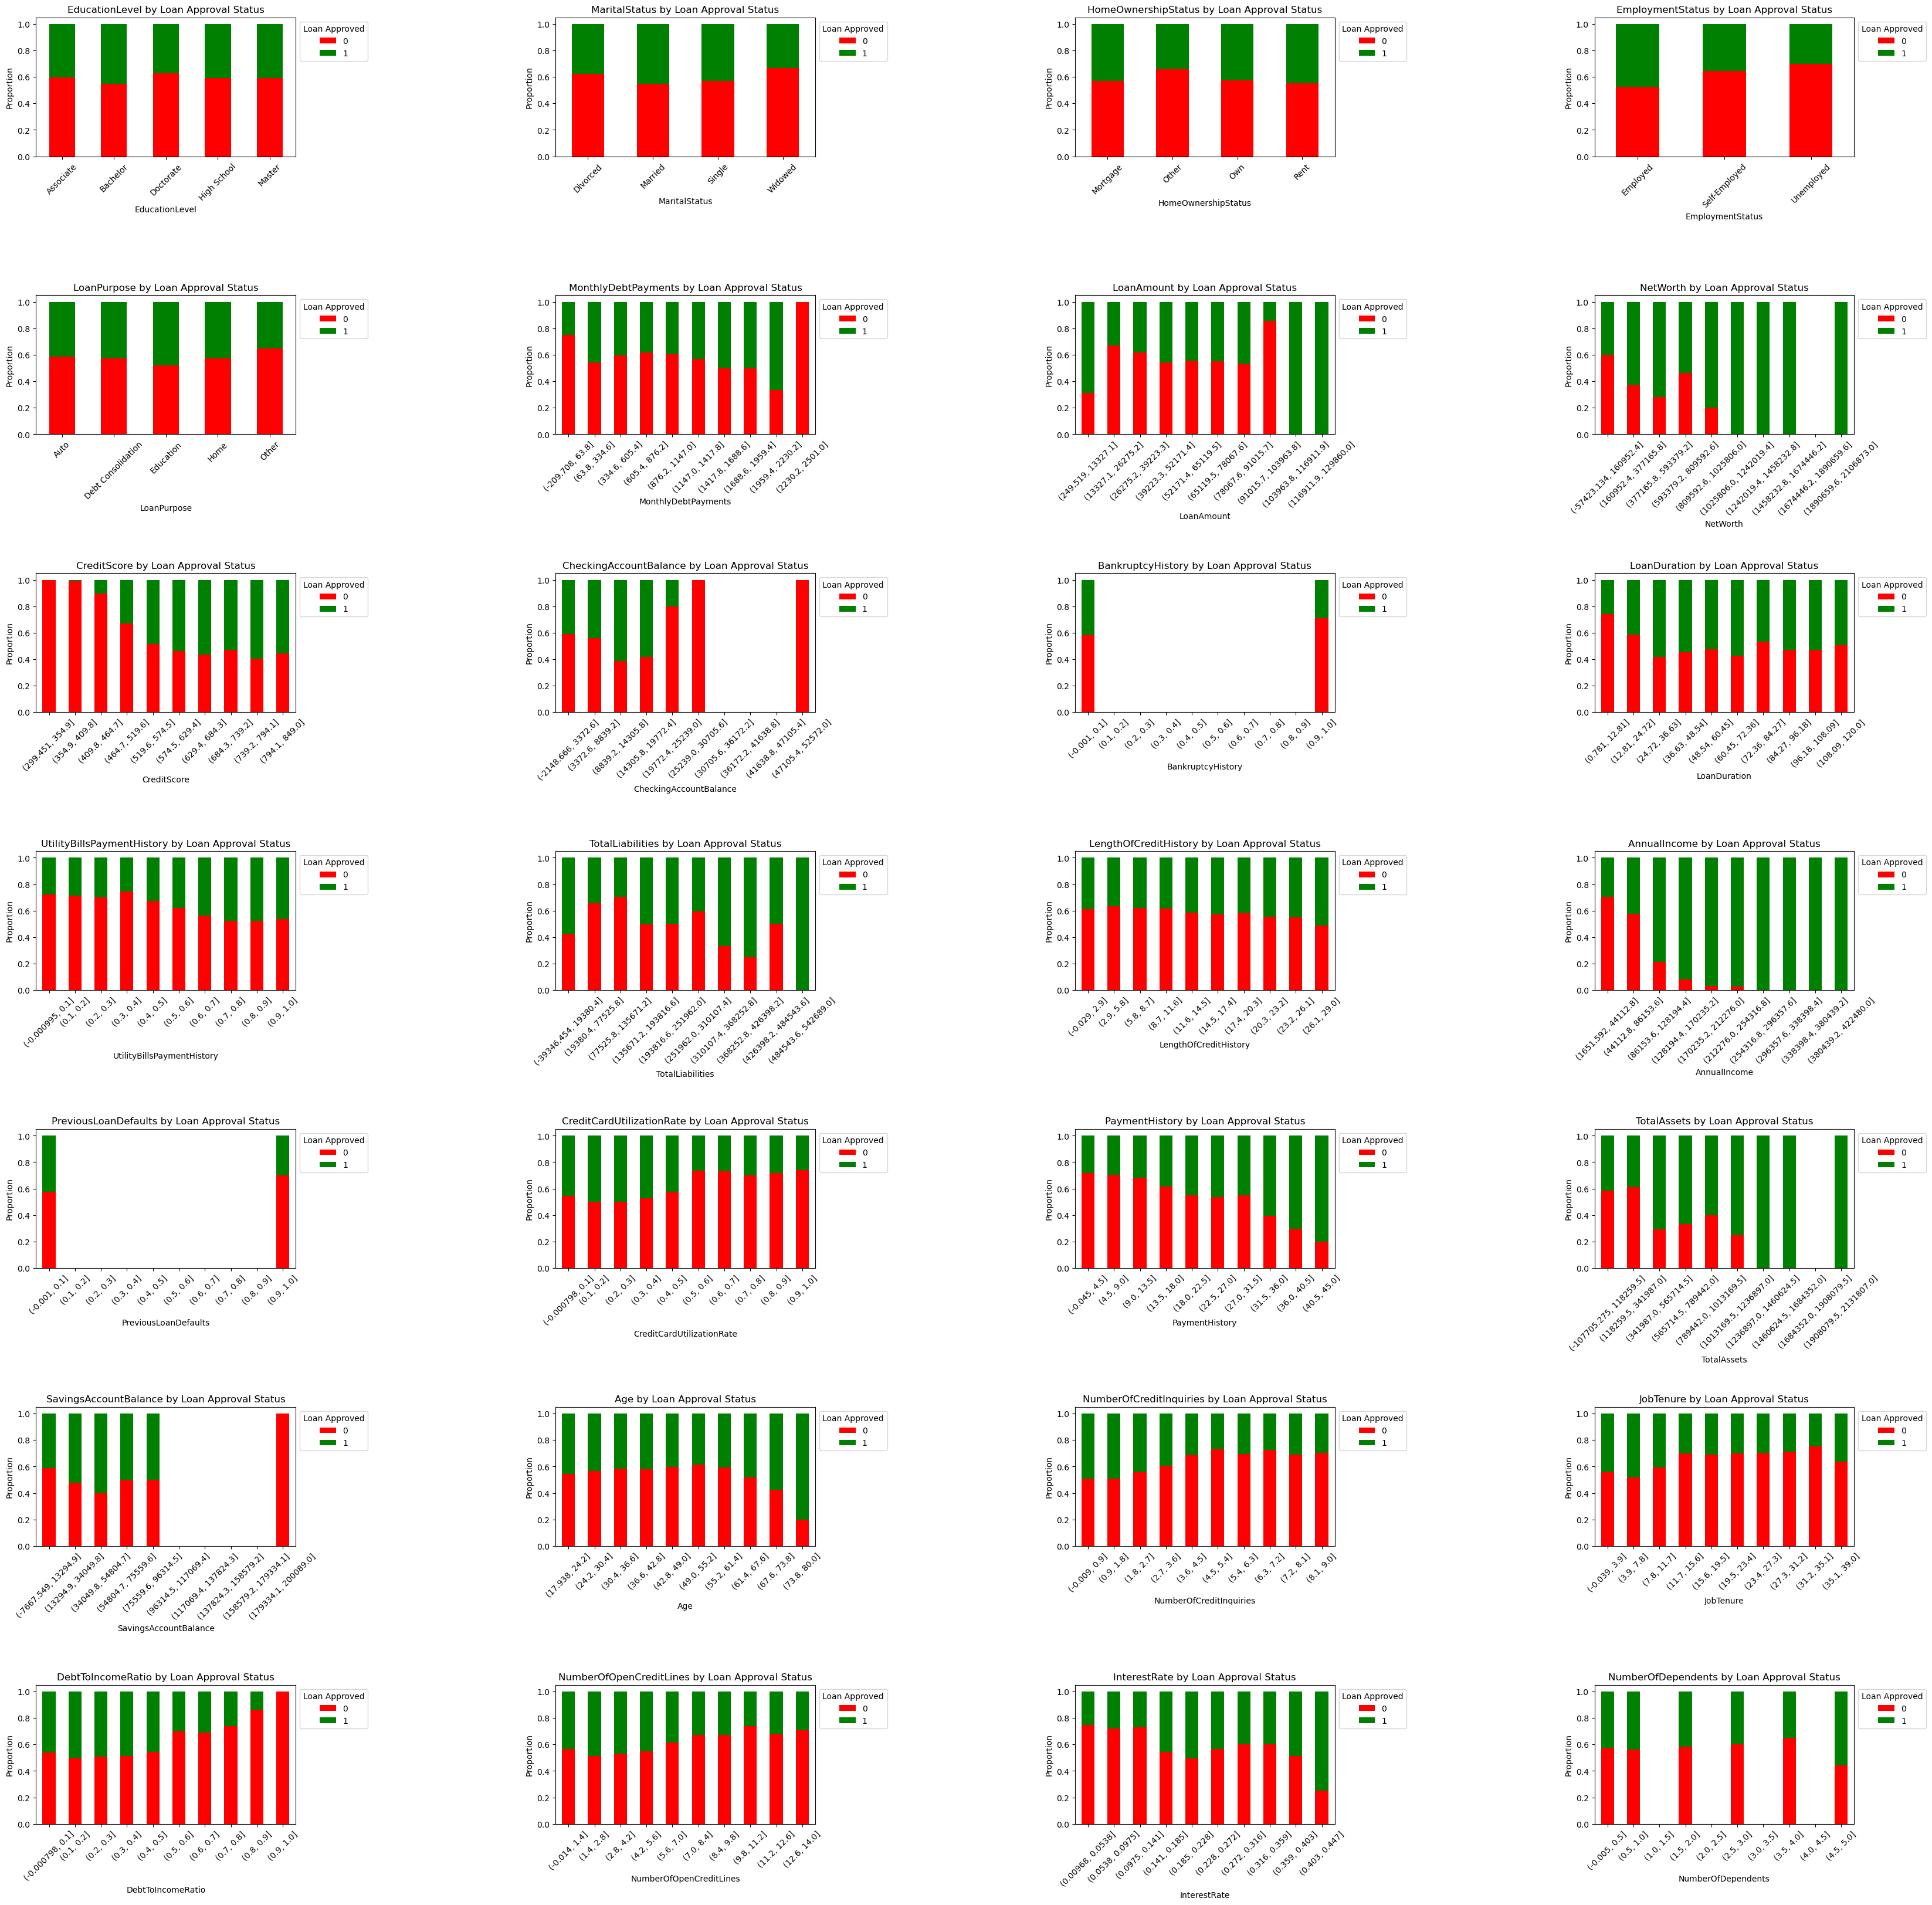

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming base_df is your original dataframe
cols_to_use1 = base_df.columns
base_df = base_df.drop(columns=[])  # Adjust to drop unwanted columns if necessary
print(cols_to_use1)

# Select categorical and continuous columns
viz1_df = base_df.drop(columns=[])  # Adjust as needed

# Find categorical and continuous columns
categorical_columns = [col for col in viz1_df.columns if viz1_df[col].dtype == 'object' or viz1_df[col].dtype == 'category']
continuous_columns = [col for col in viz1_df.columns if viz1_df[col].dtype != 'object' and viz1_df[col].dtype != 'category' and col != 'LoanApproved']

# Plotting the charts
fig, axes = plt.subplots(nrows=(len(categorical_columns) + len(continuous_columns)) // 4, ncols=4, figsize=(40, 40))
axes = axes.flatten()

# Initialize a global index for all subplots
idx = 0

# Plot for categorical columns
for col in categorical_columns:
    # Calculate proportions of LoanApproved for each category
    count_data = viz1_df.groupby([col, 'LoanApproved']).size().unstack(fill_value=0)
    
    # Normalize each category so that the total is 1 (for ratio-based stacking)
    count_data = count_data.div(count_data.sum(axis=1), axis=0)
    
    # Plot a stacked bar chart with ratios (green for approved, red for not approved)
    count_data.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axes[idx])
    
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Proportion')
    axes[idx].set_title(f'{col} by Loan Approval Status')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Loan Approved', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Increment idx after each categorical plot
    idx += 1

# Plot for continuous columns
for col in continuous_columns:
    # Bin the continuous data into intervals (you can adjust the number of bins)
    bins = 10
    viz1_df['binned'] = pd.cut(viz1_df[col], bins=bins)
    
    # Calculate proportions of LoanApproved for each bin
    count_data = viz1_df.groupby(['binned', 'LoanApproved']).size().unstack(fill_value=0)
    
    # Normalize each bin so that the total is 1 (for ratio-based stacking)
    count_data = count_data.div(count_data.sum(axis=1), axis=0)
    
    # Plot a stacked bar chart with ratios (green for approved, red for not approved)
    count_data.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axes[idx])
    
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Proportion')
    axes[idx].set_title(f'{col} by Loan Approval Status')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Loan Approved', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Increment idx after each continuous plot
    idx += 1

# Adjust the layout for better spacing
plt.subplots_adjust(hspace=1.0, wspace=1.0)
plt.show()


The visualizations above via stack bar charts show some clear trends:
1. If annual income is high enough, people have no problem getting loans.
2. Low loan amounts are usually approved
3. High DTI ratios are usually rejected
4. Higher credit card utilization usually leads to rejection
5. A higher number of open credit lines leads to approval
6. A previous loan default is likely to result in rejection
7. A very high savings account balance leads to loan rejection.
8. A high net worth leads to loan approval.

Most other factors show no clear trend.

**This makes us realize that financial ,numerical and some other factors like 'Education', 'Employment Status' etc have a profound impact on LoanApproved while other such as 'NumberOfDependents' seem to have no impact on LoanApproved.**

After observing such trends
We can choose to drop the unimportant factors.


In [22]:
# the gnb model
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../data/base.csv')
# print(df.columns)

target_column = 'LoanApproved'

# cols_to_drop = ['NumberOfDependents', 'MaritalStatus', 'LoanPurpose', 'LoanDuration', 'Age', 'JobTenure', 'TotalLiabilities']
# df = df.drop(columns=cols_to_drop)

categorical_columns = []
numeric_columns =  []
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype == 'str':
        categorical_columns.append(column)
    else:
        numeric_columns.append(column)

# nv_count = df.isna().sum()
# print('null value count is', nv_count) # there are no null values

# we will not remove outliers

# let's start by using a simple decision tree on this data.
params = {
    "criterion": ["gini"],
    "max_depth": [10,  30, 300],  
	# "max_depth": [2],  
    "min_samples_split": [2, 10, 20, 50], 
    "min_samples_leaf": [1, 2, 4, 10],  
    "max_features": ["sqrt", "log2", None],  
    "max_leaf_nodes": [None, 10, 20, 50, 100],  
    # "min_weight_fraction_leaf": [0.0, 0.01, 0.1],  # Fraction of samples required to be in a leaf node
    "ccp_alpha": [0.1],  # Complexity parameter for pruning the tree to avoid overfitting
    "class_weight": [None, "balanced"],  # If your data is imbalanced, 'balanced' can help
}


# dt = DecisionTreeClassifier()
params={}
# dt = BernoulliNB(binarize=True)
dt = GaussianNB()
rs = RandomizedSearchCV(estimator=dt, param_distributions=params, random_state=17, cv=5)


x_train, x_validation, y_train, y_validation = train_test_split(df.drop(columns=[target_column]),df[target_column], test_size=0.25, stratify=df[target_column], random_state=17)

# print(categorical_columns)
inverse = {}
for column in categorical_columns:
	if column == target_column:
		continue
	le = LabelEncoder()
	# print('column is ', column)
	x_train[column] = le.fit_transform(x_train[column])
	x_validation[column] = le.transform(x_validation[column])
	inverse[column] = le

op = rs.fit(x_train, y_train)
print(op.best_params_)
train_pred = op.predict(x_train)
validation_pred = op.predict(x_validation)



print('training score', accuracy_score(y_train, train_pred))
print('validation score', accuracy_score(y_validation, validation_pred))



# we will use visualizations on training data to generate post classification rules that might help us improve score....

    


/home/prateek/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{}
training score 0.6718666666666666
validation score 0.668


### Model output analysis through visualizations

1. Parallel Horizontal Colored Box Plots

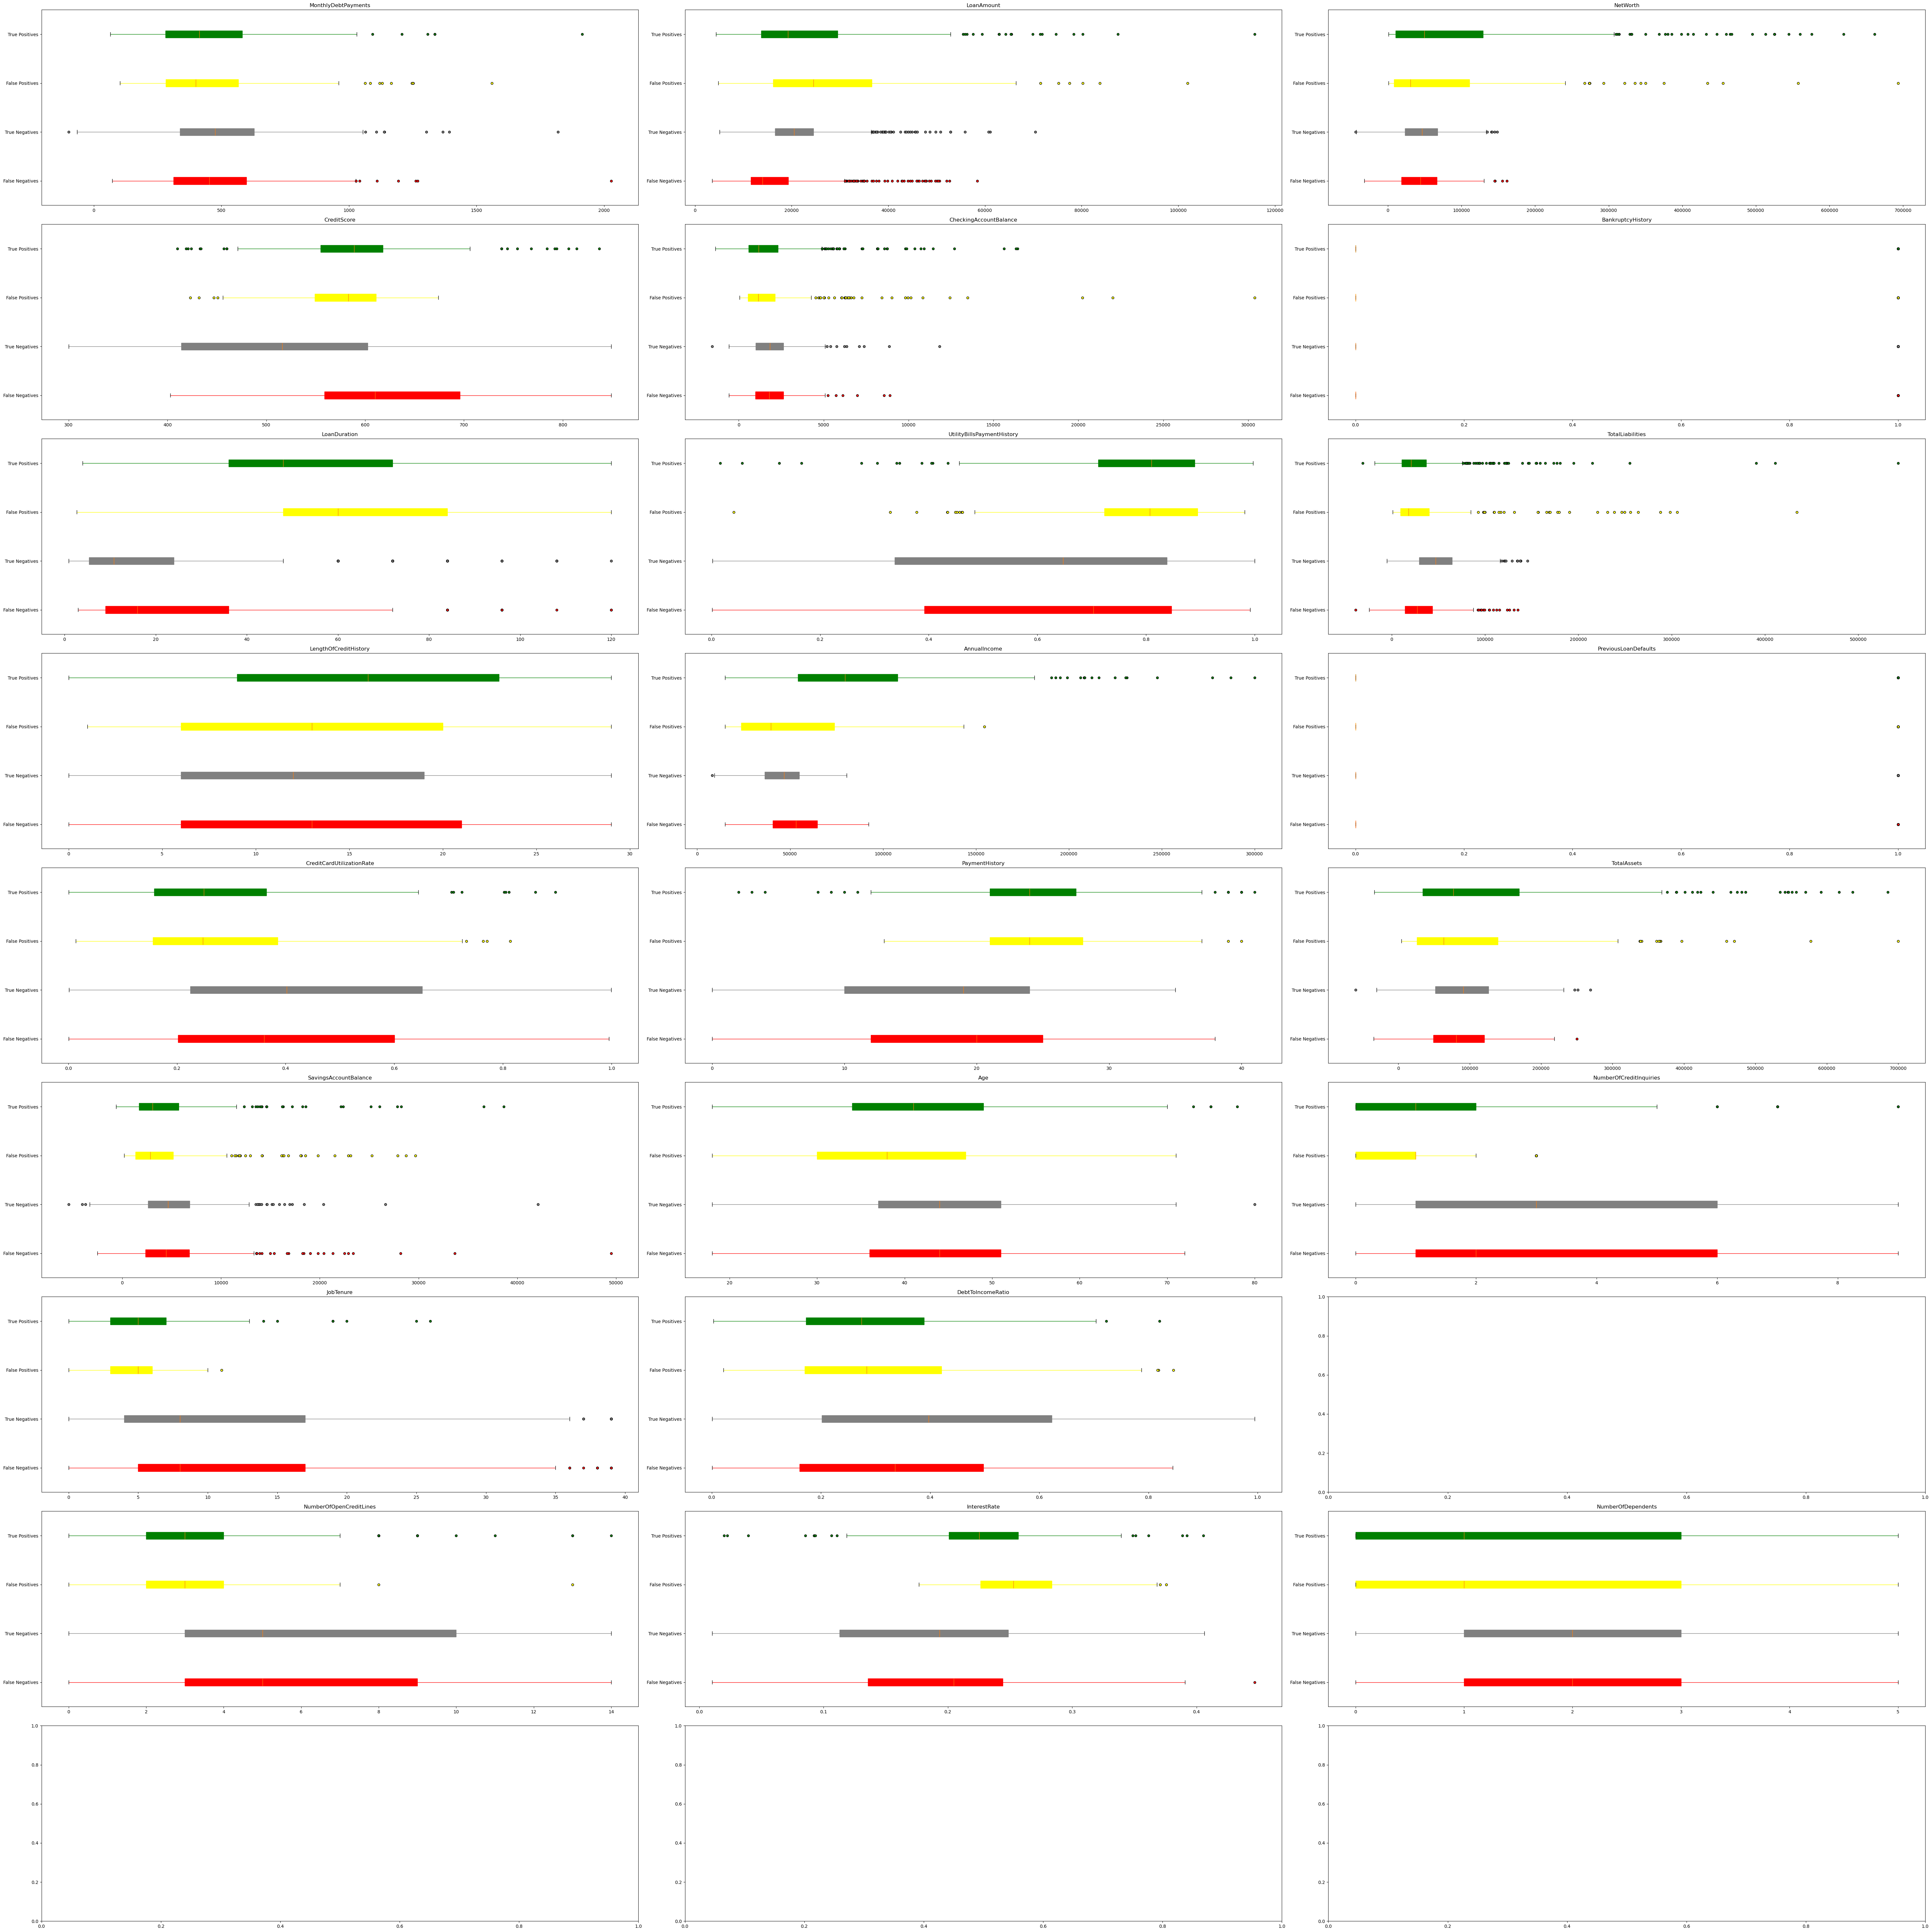

In [23]:

import matplotlib.pyplot as plt
# Here let's solely focus on the negatives
# we will get the dataframe of false negatives and the dataframe of true negatives
# similarly we did the positives


validation_df = pd.concat(axis=1, objs=[x_validation, y_validation])
# print(validation_df.head())
validation_df['predicted_value'] = validation_pred

train_df = pd.concat(axis=1, objs=[x_train, y_train])
train_df['predicted_value'] = train_pred
# print(train_df.head())

# now we must look at where we exactly we are messing up
# let us analyze the fns and the tns
validation_df_fns = validation_df[(validation_df['predicted_value'] == 0) & (validation_df['LoanApproved'] == 1)]
validation_df_tns = validation_df[(validation_df['predicted_value'] == 0) & (validation_df['LoanApproved'] == 0)]
validation_df_fps = validation_df[(validation_df['predicted_value'] == 1) & (validation_df['LoanApproved'] == 0)]
validation_df_tps = validation_df[(validation_df['predicted_value'] == 1) & (validation_df['LoanApproved'] == 1)]


train_df_fns = train_df[(train_df['predicted_value'] == 0) & (train_df['LoanApproved'] == 1)]
train_df_tns = train_df[(train_df['predicted_value'] == 0) & (train_df['LoanApproved'] == 0)]
train_df_fps = train_df[(train_df['predicted_value'] == 1) & (train_df['LoanApproved'] == 0)]
train_df_tps = train_df[(train_df['predicted_value'] == 1) & (train_df['LoanApproved'] == 1)]

# now for the false negatives and the true negatives let's make boxplots
fig, axes = plt.subplots(nrows=len(numeric_columns)//3 +1, ncols=3, figsize=(12*5, 6*10 ))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    # print(i, col)
    if col == target_column:
        continue
    ax = axes[i]
#     fns = train_df_fns[col].dropna()  # False Negatives data for the feature
#     tns = train_df_tns[col].dropna()
#     tps = train_df_tps[col].dropna()
#     fps = train_df_fps[col].dropna()
    fns = validation_df_fns[col].dropna()  # False Negatives data for the feature
    tns = validation_df_tns[col].dropna()
    tps = validation_df_tps[col].dropna()
    fps = validation_df_fps[col].dropna()

    # ax.boxplot([fns, tns], vert=False, patch_artist=True, 
    #            boxprops=dict(facecolor='red', color='red'),  # Set FN box color to red
    #            whiskerprops=dict(color='red'),  # Set FN whisker color to red
    #            flierprops=dict(marker='o', markerfacecolor='red', markersize=5),  # Set FN outliers to red
    #            positions=[1, 2])  # Position 1 for FNs, position 2 for TNs


    ax.boxplot([fns], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='red', color='red'),  # Set FN box color to red
            whiskerprops=dict(color='red'),  # Set FN whisker color to red
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5),  # Set FN outliers to red
            positions=[1])  # Position 1 for FNs

    # Plot the boxplot for True Negatives (grey color)
    ax.boxplot([tns], vert=False, patch_artist=True, 
               boxprops=dict(facecolor='grey', color='grey'),  # Set TN box color to grey
               whiskerprops=dict(color='grey'),  # Set TN whisker color to grey
               flierprops=dict(marker='o', markerfacecolor='grey', markersize=5),  # Set TN outliers to grey
               positions=[2])  # Position 2 for TNs
    
    ax.boxplot([fps], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='yellow', color='yellow'),  # Set FN box color to yellow
            whiskerprops=dict(color='yellow'),  # Set FN whisker color to yellow
            flierprops=dict(marker='o', markerfacecolor='yellow', markersize=5),  # Set FN outliers to red
            positions=[3]) 
    
    ax.boxplot([tps], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='green', color='green'),  # Set FN box color to green
            whiskerprops=dict(color='green'),  # Set FN whisker color to green
            flierprops=dict(marker='o', markerfacecolor='green', markersize=5),  # Set FN outliers to red
            positions=[4]) 

    ax.set_yticklabels(['False Negatives', 'True Negatives', 'False Positives', 'True Positives'])  # Set labels for each box plot
    ax.set_title(f'{col}')  # Title for each plot
    # ax.set_xlabel('Value')  # Label for the x-axis
    # ax.set_ylabel('Category')  # Label for the y-axis (optional)

    # Customize the TN box (grey color)
    # ax.boxplot([fns, tns], vert=False, patch_artist=True, 
    #            boxprops=dict(facecolor='grey', color='grey'),  # Set TN box color to grey
    #            whiskerprops=dict(color='grey'),  # Set TN whisker color to grey
    #            flierprops=dict(marker='o', markerfacecolor='grey', markersize=5),  # Set TN outliers to grey
    #            positions=[1, 2])  # Position 1 for FNs, position 2 for TNs
    # break
plt.tight_layout()
# plt.subplots_adjust(hspace=1, wspace=1.5)
plt.show()

# ITER=1
# for column in df.columns:
#     if ITER == 0:
#         break



#     ITER -= 1


The box plots above show feature-wise classification results of the model. The colors and their meanings are stated below:
green - true positives
yellow - false positives
grey - true negatives
red - false negatives

For a certain feature by observing the green, yellow, grey and red areas, we are able to see in which feature range the model performed the worst. For some features the boxes for each category are almost parallel. This shows that across the same range of the feature's values, both misclassified and correctly classified samples are equally prevalent. This means that by seeing only this variable, we are unable to conclude anything. This can be seen in the box plots for monthly debt payments and loan durations. On the other hand if we see features such as annual income there is a clear distinction between the feature ranges for the true positives and the true negatives which shows us that our model can easily use these features to classify.

Notice that there is a very high error rate in the credit score feature. High credit scores turn out to be false negatives.

2. Parallel Coordinate Plots

In [24]:
# here we will try using parallel coordinate plots
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# take only the important numeric columns
numeric_columns = ['CreditScore', 'AnnualIncome', 'LoanAmount', 'InterestRate', 'DebtToIncomeRatio', 'FN_TN']

# Assuming you already have 'validation_df_fns' and 'validation_df_tns'
# Combine both False Negatives and True Negatives into one DataFrame
fns_tns_df = pd.concat([validation_df_fns, validation_df_tns], axis=0)
fns_tns_df['FN_TN'] = abs(fns_tns_df['LoanApproved'] - fns_tns_df['predicted_value'])
# so for a false negative the value will be 0

# Handle categorical columns: convert them to numeric using LabelEncoder (or one-hot encoding if needed)


# Set color mapping for FN and TN
fns_tns_df['color'] = fns_tns_df['FN_TN'].map({0: 'red', 1: 'grey'})

# List of numeric columns (assuming 'numeric_columns' is already defined)

print(numeric_columns)
# Create the parallel coordinates plot
fig = px.parallel_coordinates(
    fns_tns_df,
    color='FN_TN',  # Use the 'FN_TN' column to differentiate colors
    color_continuous_scale=['red', 'grey'],  # Define colors for FN and TN
    dimensions=numeric_columns,  
    labels={col: col for col in numeric_columns},  # Labels for the axes
    title="Parallel Coordinates Plot for False Negatives and True Negatives"
)

# Show the plot
plt.tight_layout()
fig.show()


['CreditScore', 'AnnualIncome', 'LoanAmount', 'InterestRate', 'DebtToIncomeRatio', 'FN_TN']


<Figure size 640x480 with 0 Axes>

In [ ]:
# here we will try using parallel coordinate plots
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# take only the important numeric columns
numeric_columns = ['CreditScore', 'AnnualIncome', 'LoanAmount', 'Age', 'InterestRate', 'DebtToIncomeRatio', 'FP_TP']

# Assuming you already have 'validation_df_fns' and 'validation_df_tns'
# Combine both False Negatives and True Negatives into one DataFrame
fps_tps_df = pd.concat([validation_df_fps, validation_df_tps], axis=0)
fps_tps_df['FP_TP'] = abs(fps_tps_df['LoanApproved'] - fps_tps_df['predicted_value'])
# so for a false negative the value will be 0

# Handle categorical columns: convert them to numeric using LabelEncoder (or one-hot encoding if needed)


# Set color mapping for FN and TN
fps_tps_df['color'] = fps_tps_df['FP_TP'].map({0: 'yellow', 1: 'green'})

# List of numeric columns (assuming 'numeric_columns' is already defined)

# Create the parallel coordinates plot
fig = px.parallel_coordinates(
    fps_tps_df,
    color='FP_TP',  # Use the 'FN_TN' column to differentiate colors
    color_continuous_scale=['yellow', 'green'],  # Define colors for FN and TN
    dimensions=numeric_columns,  # Include both numeric and categorical columns
    labels={col: col for col in numeric_columns},  # Labels for the axes
    title="Parallel Coordinates Plot for False Negatives and True Negatives"
)

# Show the plot
plt.tight_layout()
fig.show()


<Figure size 640x480 with 0 Axes>

The parallel coordinates plot above looks complicated at first. There are too many lines and they are all overlapping.
However, upon brushing things become a lot more clear. 
Brush the FP_TP column to see only yellow lines i.e. the False Negatives. Now brush all annual incomes from 200k to 485k. We see that most of these points were misclassified. The model believed that as these individuals have high incomes, their DTI, Age, InterestRate and CreditScore don't matter.
Similarly upon brushing credit scores greater than 600, we see that most individuals in this range have low  annual incomes and were classified as positive solely based high credit score.
This makes us realize that the interplay between various columns in very important and the naive assumption of our gaussian naive bayes model may not be giving us the best results.

### Data Transformation
Following additional features are engineered:<br>
'LoanAmountPerIncome'<br>
'LoanDurationToAge'<br>
'LoanAmountToCreditScore'<br>
'NetWorth'<br>
'CredRatio'<br>
'Familia'<br>
'AnnualIncome_mul_PaymentHistory'<br>
'CreditScore_and_DTI'<br>

In [25]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


import pandas as pd


viz_df = pd.read_csv('../data/base.csv')


# Target column
target_column = 'LoanApproved'

# Feature engineering: create ratio features
# viz_df['CreditUtilizationPerIncome'] = viz_df['CreditCardUtilizationRate'] / viz_df['AnnualIncome']
viz_df['LoanAmountPerIncome'] = viz_df['LoanAmount'] / viz_df['AnnualIncome'] # this makes sense i.e. this ratio should not be high
viz_df['LoanDurationToAge'] = viz_df['LoanDuration'] / viz_df['Age'] # his also makes some sense
viz_df['LoanAmountToCreditScore'] = viz_df['LoanAmount'] / viz_df['CreditScore'] 
viz_df['NetWorth'] = viz_df['TotalAssets'] - viz_df['TotalLiabilities']
viz_df['CredRatio'] = viz_df['NumberOfCreditInquiries'] / (viz_df['LengthOfCreditHistory']+1)
viz_df['Familia'] = viz_df['NumberOfDependents'] + pd.Series(int(x) for x in (viz_df['MaritalStatus'] == 1))
viz_df['AnnualIncome_mul_PaymentHistory'] = viz_df['AnnualIncome'] * viz_df['PaymentHistory']
viz_df['CreditScore_and_DTI'] = (viz_df['CreditScore'] + viz_df['DebtToIncomeRatio']) / 2


cols_to_drop = []

categorical_columns = ['EducationLevel', 'HomeOwnershipStatus', 'EmploymentStatus', 'LoanPurpose', 'MaritalStatus',
                       'PreviousLoanDefaults', 'BankruptcyHistory']
numerical_columns = ['CreditCardUtilizationRate', 'JobTenure',  
                     'SavingsAccountBalance', 'DebtToIncomeRatio', 'NumberOfDependents', 
                     'CreditScore', 'InterestRate', 'CheckingAccountBalance', 
                     'LoanAmount', 'MonthlyDebtPayments', 'NumberOfOpenCreditLines',  
                     'LoanApproved',
                     'AnnualIncome', 'LoanDuration', 'TotalLiabilities', 'Age', 'TotalAssets', 
                     'NumberOfCreditInquiries', 'LengthOfCreditHistory',
                     'Familia', 
                     'CredRatio', 
                     'NetWorth', 
                     'LoanDurationToAge', 
                     'LoanAmountPerIncome'
                     ]

print('cahges', len(categorical_columns) + len(numerical_columns))

# , 
# 

# Apply OneHotEncoding to categorical variables
# for x in to_drop:
#     if x in categorical_columns:
#         categorical_columns.remove(x)

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

encoded_categoricals = encoder.fit_transform(viz_df[categorical_columns])

# Convert the encoded categorical variables to a DataFrame
encoded_categoricals_df = pd.DataFrame(encoded_categoricals.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# for x in to_drop:
#     if x in numerical_columns:
#         numerical_columns.remove(x)
# scaler = StandardScaler()
# scaled_numericals = scaler.fit_transform(viz_df[numerical_columns])

# Convert scaled numerical variables to a DataFrame
# scaled_numericals_df = pd.DataFrame(scaled_numericals, columns=numerical_columns)
numericals_df = pd.DataFrame(viz_df[numerical_columns], columns=numerical_columns)

# Step 3: Combine transformed numerical and categorical data
# Drop original categorical columns and merge the scaled numerical and encoded categorical features
viz_df_transformed = pd.concat([encoded_categoricals_df, numericals_df], axis=1)

# Now, viz_df_transformed contains all the transformed features


print(len(viz_df_transformed.columns))
print(viz_df_transformed.columns)

cahges 31


42
Index(['EducationLevel_Bachelor', 'EducationLevel_Doctorate',
       'EducationLevel_High School', 'EducationLevel_Master',
       'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Own',
       'HomeOwnershipStatus_Rent', 'EmploymentStatus_Self-Employed',
       'EmploymentStatus_Unemployed', 'LoanPurpose_Debt Consolidation',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'PreviousLoanDefaults_1',
       'BankruptcyHistory_1', 'CreditCardUtilizationRate', 'JobTenure',
       'SavingsAccountBalance', 'DebtToIncomeRatio', 'NumberOfDependents',
       'CreditScore', 'InterestRate', 'CheckingAccountBalance', 'LoanAmount',
       'MonthlyDebtPayments', 'NumberOfOpenCreditLines', 'LoanApproved',
       'AnnualIncome', 'LoanDuration', 'TotalLiabilities', 'Age',
       'TotalAssets', 'NumberOfCreditInquiries', 'LengthOfCreditHistory',
       'Familia', 'CredRatio', 'NetWorth', '

### ITERATION 2

## Visualizing the new engineered features

/tmp/ipykernel_430500/92507236.py:51: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_430500/92507236.py:51: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_430500/92507236.py:51: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_430500/92507236.py:51: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

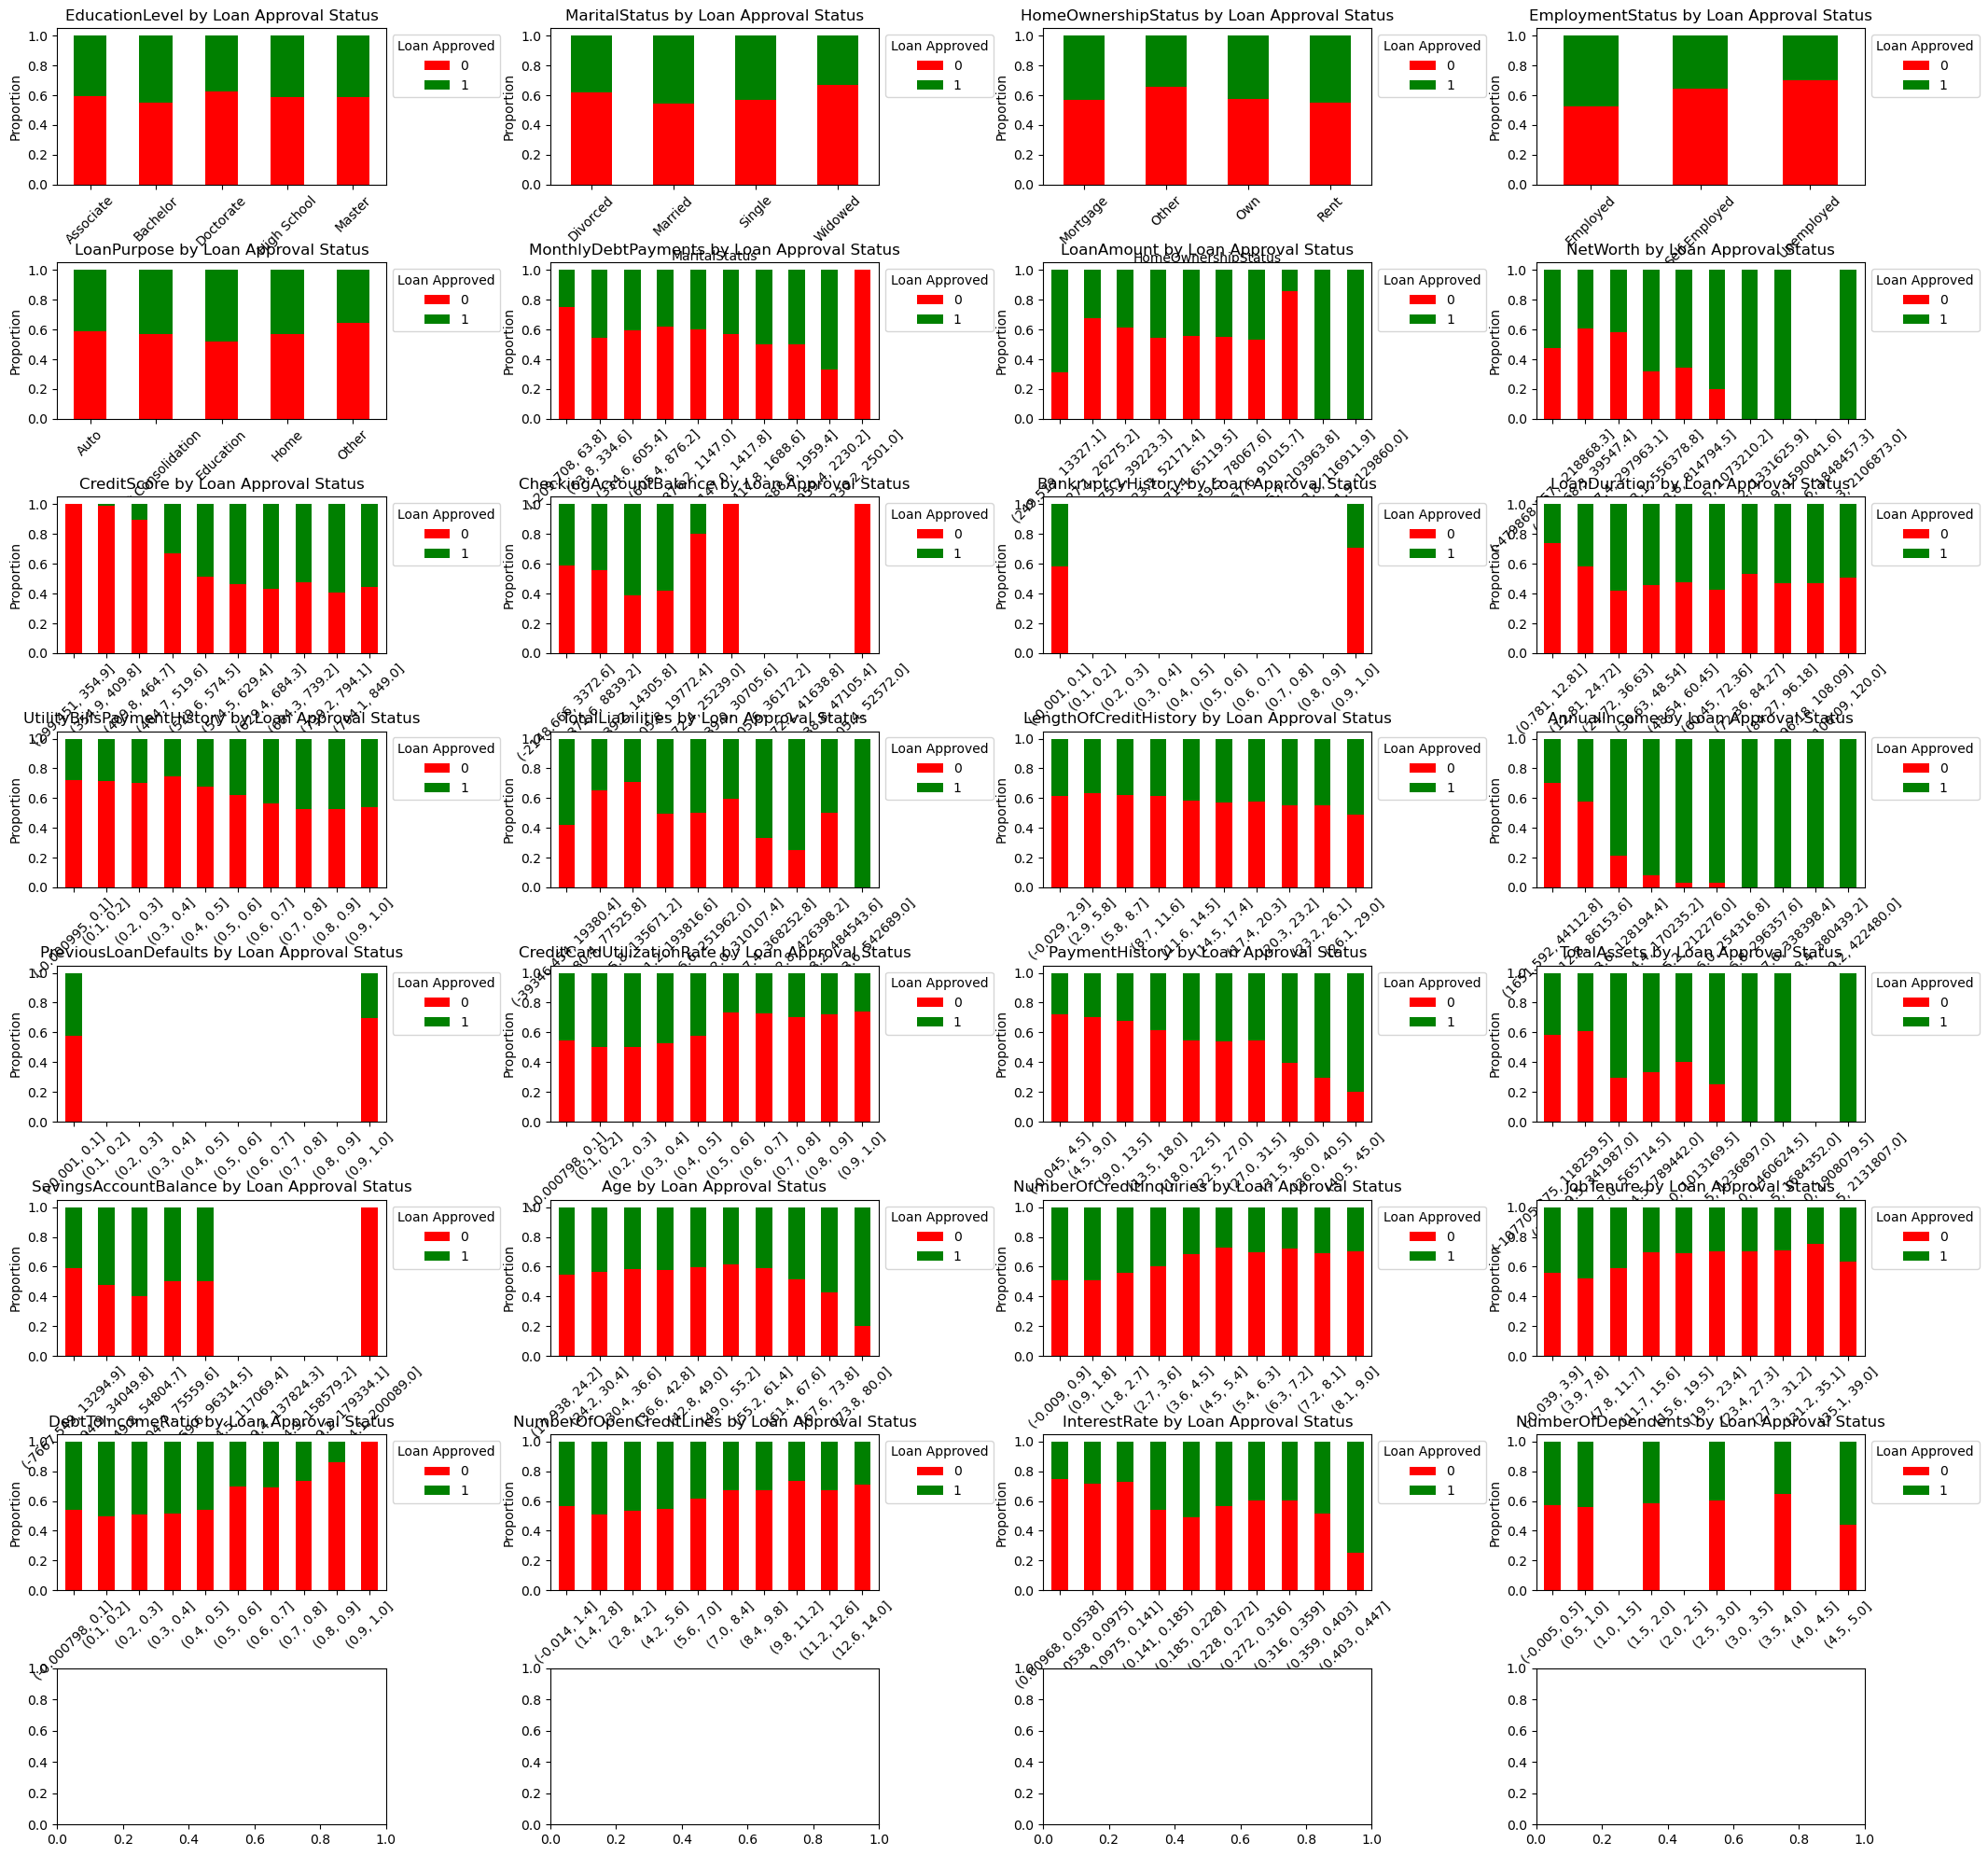

In [26]:
# the transformed data is very similar to the original data except for the encodings
# here we visualize the important transformed variables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





viz1_df = viz_df 

# Find categorical and continuous columns
categorical_columns = [col for col in cols_to_use1 if viz1_df[col].dtype == 'object' or viz1_df[col].dtype == 'category']
continuous_columns = [col for col in cols_to_use1 if viz1_df[col].dtype != 'object' and viz1_df[col].dtype != 'category' and col != 'LoanApproved']

# Plotting the charts
fig, axes = plt.subplots(nrows=(len(categorical_columns) + len(continuous_columns)) // 4 + 1, ncols=4, figsize=(25, 25))
axes = axes.flatten()

# Initialize a global index for all subplots
idx = 0

# Plot for categorical columns
for col in categorical_columns:
    # Calculate proportions of LoanApproved for each category
    count_data = viz1_df.groupby([col, 'LoanApproved']).size().unstack(fill_value=0)
    
    # Normalize each category so that the total is 1 (for ratio-based stacking)
    count_data = count_data.div(count_data.sum(axis=1), axis=0)
    
    # Plot a stacked bar chart with ratios (green for approved, red for not approved)
    count_data.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axes[idx])
    
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Proportion')
    axes[idx].set_title(f'{col} by Loan Approval Status')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Loan Approved', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Increment idx after each categorical plot
    idx += 1

# Plot for continuous columns
for col in continuous_columns:
    # Bin the continuous data into intervals (you can adjust the number of bins)
    bins = 10
    viz1_df['binned'] = pd.cut(viz1_df[col], bins=bins)
    
    # Calculate proportions of LoanApproved for each bin
    count_data = viz1_df.groupby(['binned', 'LoanApproved']).size().unstack(fill_value=0)
    
    # Normalize each bin so that the total is 1 (for ratio-based stacking)
    count_data = count_data.div(count_data.sum(axis=1), axis=0)
    
    # Plot a stacked bar chart with ratios (green for approved, red for not approved)
    count_data.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axes[idx])
    
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Proportion')
    axes[idx].set_title(f'{col} by Loan Approval Status')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Loan Approved', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Increment idx after each continuous plot
    idx += 1

# Adjust the layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()



In [27]:
# training the xgb classifier with the new features
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


all_df = pd.read_csv('../data/base.csv')
for col in all_df.columns:
    if all_df[col].dtype == 'object' or (all_df[col].dtype == 'str'):
        le = LabelEncoder()
        all_df[col] = le.fit_transform(all_df[col])
        
x_train, x_validation, y_train, y_validation = train_test_split(all_df.drop(columns=['LoanApproved']), all_df['LoanApproved'], stratify=all_df['LoanApproved'], random_state=17, test_size=0.25)


gnb = XGBClassifier(
    learning_rate=0.1,  # Lower learning rate
    # n_estimators=1000,  # Increase the number of boosting rounds to compensate
    random_state=17
) # gives 0.82 on validation which is the best
gnb.fit(x_train, y_train)
train_pred = gnb.predict(x_train)
validation_pred = gnb.predict(x_validation)

print("Train score", accuracy_score(y_train, train_pred))
print("Validation score ", accuracy_score(y_validation, validation_pred))



Train score 0.9256
Validation score  0.8136


In [ ]:
viz_df = viz_df_transformed
x_train, x_validation, y_train, y_validation = train_test_split(viz_df.drop(columns=['LoanApproved']), viz_df_transformed['LoanApproved'], stratify=viz_df_transformed['LoanApproved'], random_state=17, test_size=0.2)

# gnb = GaussianNB()
gnb = XGBClassifier(random_state =17)
gnb.fit(x_train, y_train)
train_pred = gnb.predict(x_train)
validation_pred = gnb.predict(x_validation)

print("Train score", accuracy_score(y_train, train_pred))
print("Validation score ", accuracy_score(y_validation, validation_pred))

Train score 0.99675
Validation score  0.8145


In [29]:
# to get better results, we can try hyperparameter tuning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


all_df = pd.read_csv('../data/base.csv')


# cols_to_drop = ['LoanDuration']
# all_df = all_df.drop(columns=['LoanDuration'])


# Label Encoding for categorical columns
# for col in all_df.columns:
#     if all_df[col].dtype == 'object' or all_df[col].dtype == 'str':
#         le = LabelEncoder()
#         all_df[col] = le.fit_transform(all_df[col])
categorical_columns = []
numerical_columns = []
for column in all_df.columns:
    if all_df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

encoded_categoricals = encoder.fit_transform(all_df[categorical_columns])
encoded_categoricals_df = pd.DataFrame(encoded_categoricals.toarray(), columns=encoder.get_feature_names_out(categorical_columns))
numericals_df = pd.DataFrame(all_df[numerical_columns], columns=numerical_columns)

all_df = pd.DataFrame(pd.concat([numericals_df, encoded_categoricals_df], axis='columns'))


# Train-test split (stratified to maintain class balance)
x_train, x_validation, y_train, y_validation = train_test_split(
    all_df.drop(columns=['LoanApproved']),
    all_df['LoanApproved'],
    stratify=all_df['LoanApproved'],
    random_state=17,
    test_size=0.25
)

# x_train, x_validation, y_train, y_validation = train_test_split(
#     viz_df.drop(columns=['LoanApproved']),
#     viz_df['LoanApproved'],
#     stratify=viz_df['LoanApproved'],
#     random_state=17,
#     test_size=0.2
# )

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],  # Max depth of trees
    'min_child_weight': [1, 2, 3, 4, 5],  # Minimum sum of instance weight in a child
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Step size shrinking
    'n_estimators': [100, 200, 500, 1000],  # Number of trees
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for each tree
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],  # Fraction of features used for each tree
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction for further partitioning
    'reg_lambda': [0, 0.1, 1, 10],  # L2 regularization
    'reg_alpha': [0, 0.1, 1, 10],  # L1 regularization
}

# Initialize XGBoost Classifier
xgb = XGBClassifier(random_state=17)

# Set up RandomizedSearchCV with cross-validation
rs = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations to sample
    scoring='accuracy',  # Use accuracy for evaluation
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=17,
    n_jobs=-1  # Use all available CPUs for faster computation
)

# Fit the model using RandomizedSearchCV
print('the training columns are ', x_train.columns)
rs.fit(x_train, y_train)


# Best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:", rs.best_params_)

# Train predictions and validation predictions using the best model found
best_model = rs.best_estimator_

train_pred = best_model.predict(x_train)
validation_pred = best_model.predict(x_validation)

# Print accuracy scores
print("Train score:", accuracy_score(y_train, train_pred))
print("Validation score:", accuracy_score(y_validation, validation_pred))

# Optionally, you can use this model to make predictions on test data as well.
# new_df = test_df  # Replace with actual test dataframe if available
# test_pred = best_model.predict(new_df)
# new_df['LoanApproved'] = test_pred
# new_df.to_csv('predictions.csv', index=False)


the training columns are  Index(['MonthlyDebtPayments', 'LoanAmount', 'NetWorth', 'CreditScore',
       'CheckingAccountBalance', 'BankruptcyHistory', 'LoanDuration',
       'UtilityBillsPaymentHistory', 'TotalLiabilities',
       'LengthOfCreditHistory', 'AnnualIncome', 'PreviousLoanDefaults',
       'CreditCardUtilizationRate', 'PaymentHistory', 'TotalAssets',
       'SavingsAccountBalance', 'Age', 'NumberOfCreditInquiries', 'JobTenure',
       'DebtToIncomeRatio', 'NumberOfOpenCreditLines', 'InterestRate',
       'NumberOfDependents', 'EducationLevel_Bachelor',
       'EducationLevel_Doctorate', 'EducationLevel_High School',
       'EducationLevel_Master', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widowed',
       'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Own',
       'HomeOwnershipStatus_Rent', 'EmploymentStatus_Self-Employed',
       'EmploymentStatus_Unemployed', 'LoanPurpose_Debt Consolidation',
       'LoanPurpose_Education', 'LoanPurpose_Ho

### Visualizing results of the new model and comparing with the old one

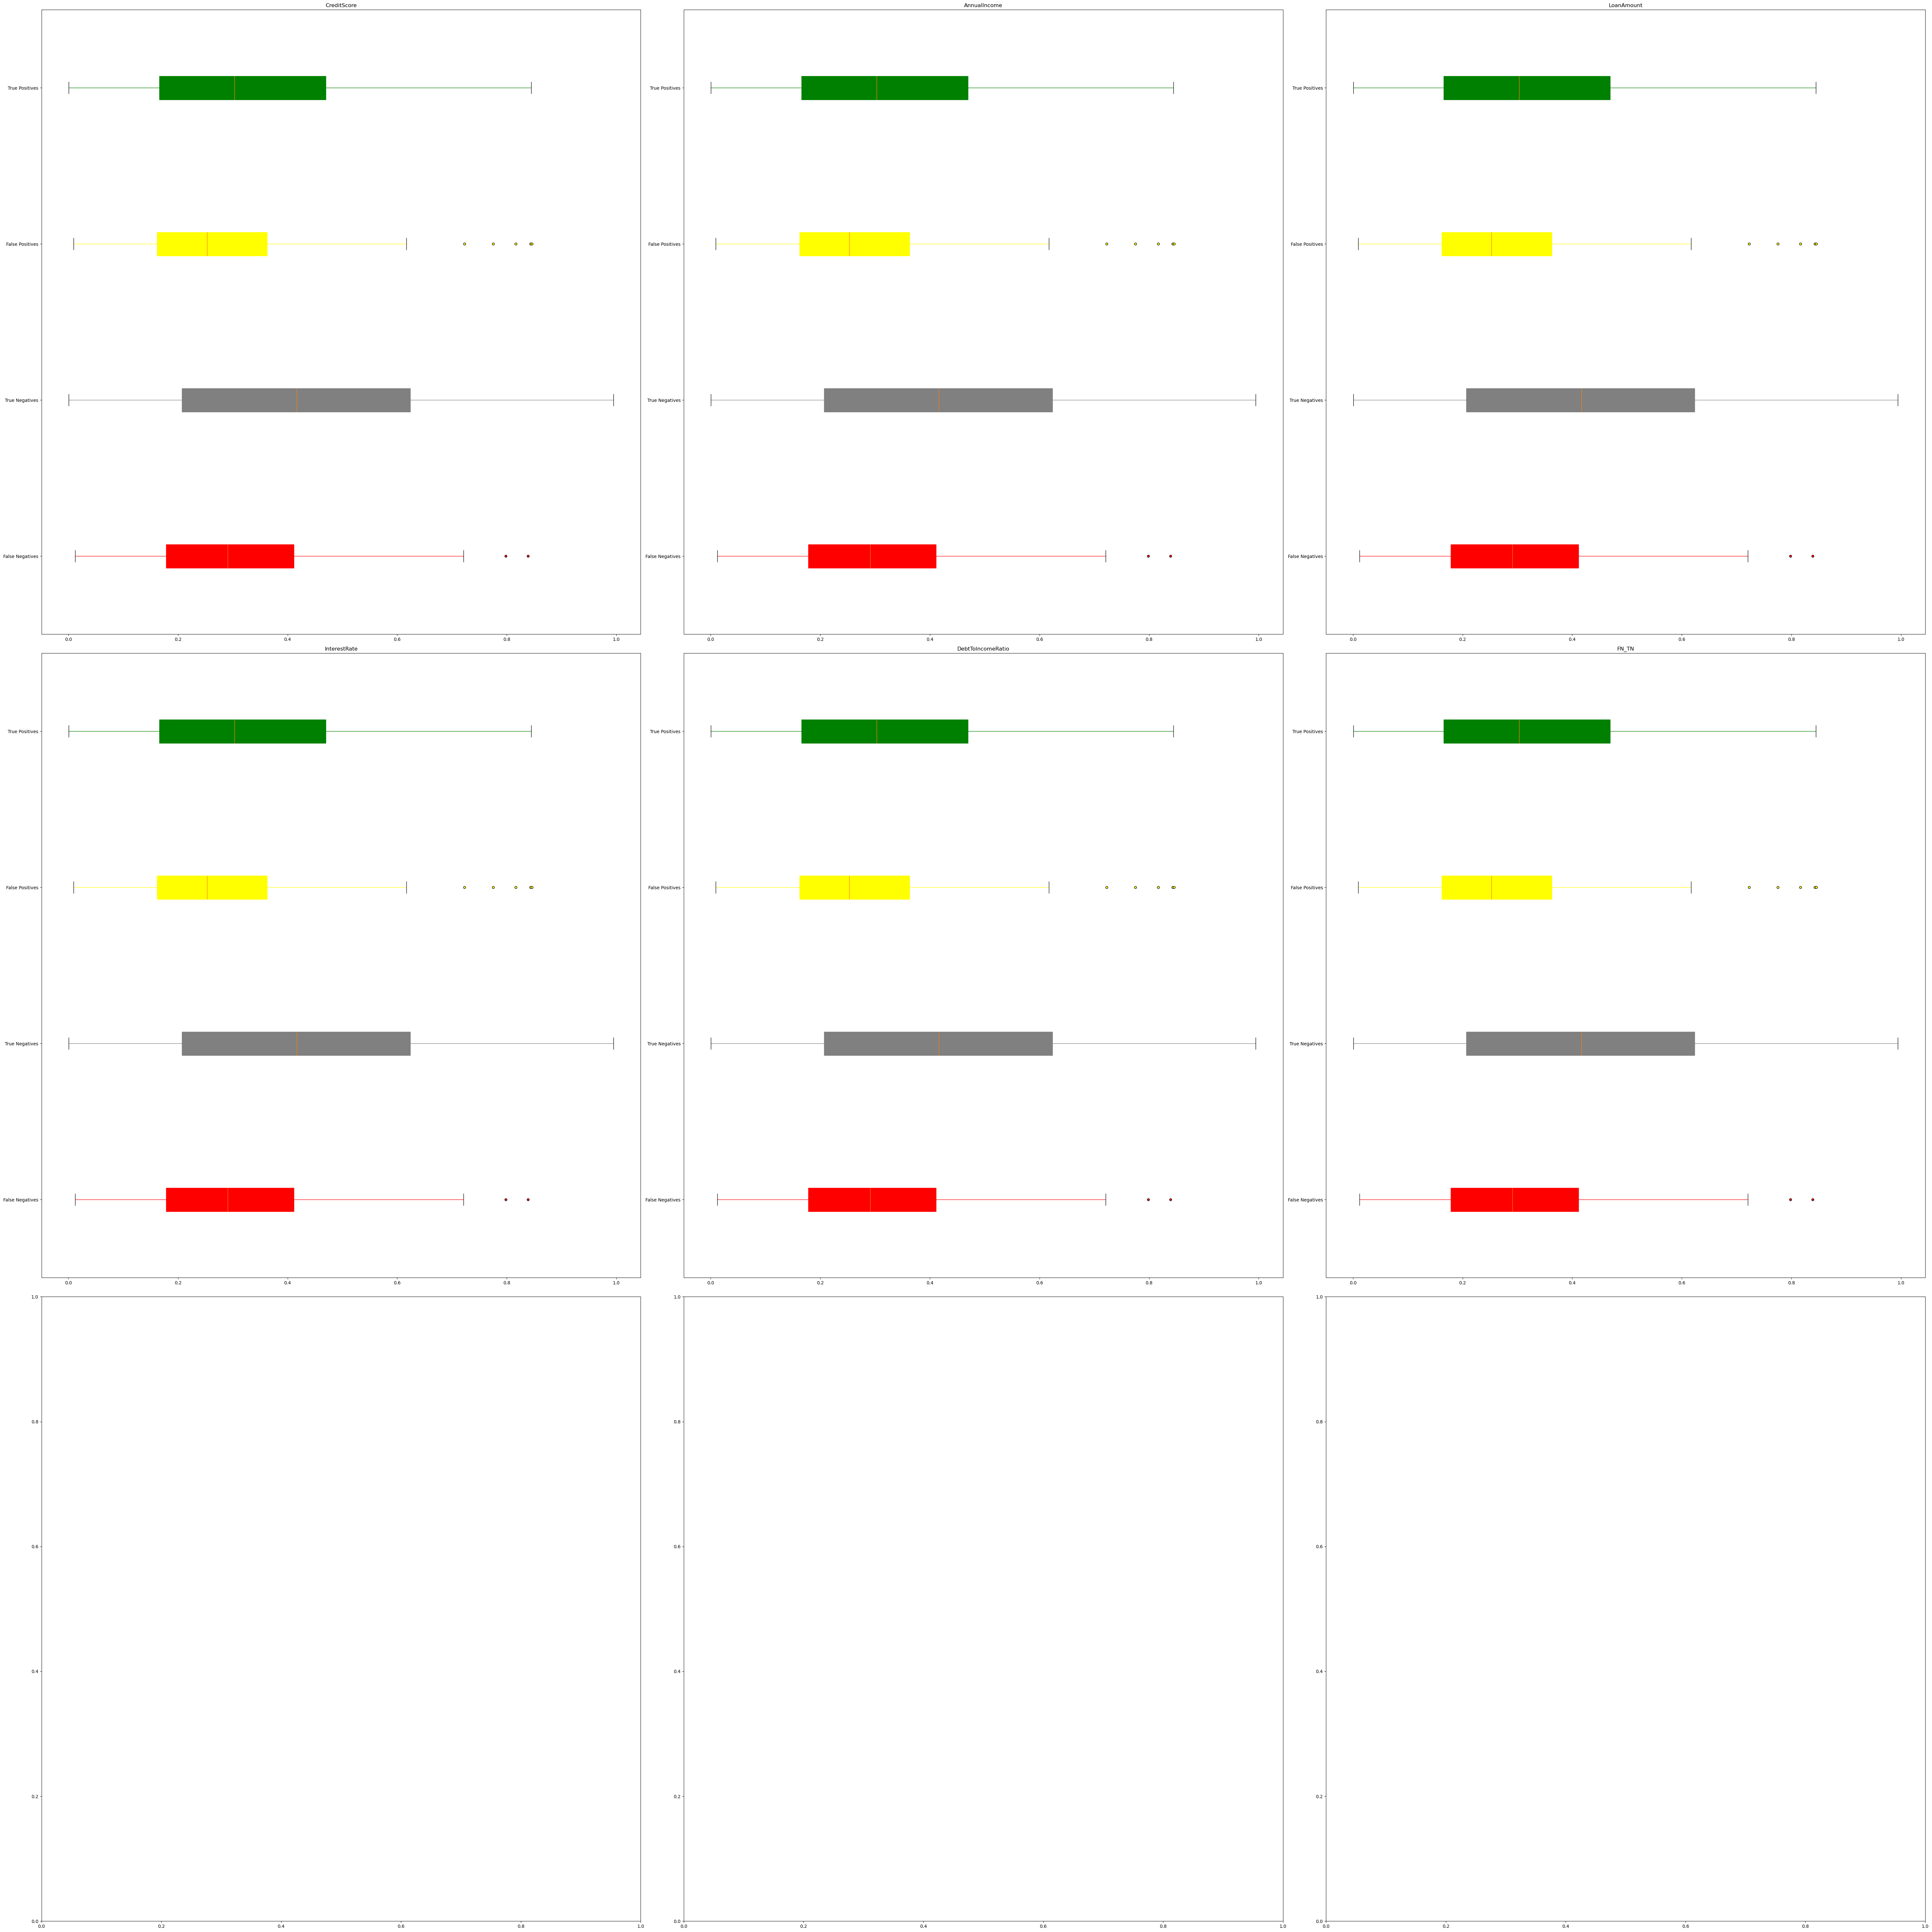

In [30]:
# boxplots once again

import matplotlib.pyplot as plt
# Here let's solely focus on the negatives
# we will get the dataframe of false negatives and the dataframe of true negatives
# similarly we did the positives


validation_df = pd.concat(axis=1, objs=[x_validation, y_validation])
# print(validation_df.head())
validation_df['predicted_value'] = validation_pred

train_df = pd.concat(axis=1, objs=[x_train, y_train])
train_df['predicted_value'] = train_pred
# print(train_df.head())

# now we must look at where we exactly we are messing up
# let us analyze the fns and the tns
validation_df_fns = validation_df[(validation_df['predicted_value'] == 0) & (validation_df['LoanApproved'] == 1)]
validation_df_tns = validation_df[(validation_df['predicted_value'] == 0) & (validation_df['LoanApproved'] == 0)]
validation_df_fps = validation_df[(validation_df['predicted_value'] == 1) & (validation_df['LoanApproved'] == 0)]
validation_df_tps = validation_df[(validation_df['predicted_value'] == 1) & (validation_df['LoanApproved'] == 1)]


train_df_fns = train_df[(train_df['predicted_value'] == 0) & (train_df['LoanApproved'] == 1)]
train_df_tns = train_df[(train_df['predicted_value'] == 0) & (train_df['LoanApproved'] == 0)]
train_df_fps = train_df[(train_df['predicted_value'] == 1) & (train_df['LoanApproved'] == 0)]
train_df_tps = train_df[(train_df['predicted_value'] == 1) & (train_df['LoanApproved'] == 1)]

# now for the false negatives and the true negatives let's make boxplots
fig, axes = plt.subplots(nrows=len(numeric_columns)//3 + 1, ncols=3, figsize=(12*5, 6*10 ))
axes = axes.flatten()


if 'FP_TP' in numeric_columns:
    numeric_columns.remove('FN_TN')
if 'FP_TP' in numeric_columns:
    numeric_columns.remove('FN_TN')

for i, col in enumerate(numeric_columns):
    # print(i, col)
    if col == target_column:
        continue
    ax = axes[i]


    # ax.boxplot([fns, tns], vert=False, patch_artist=True, 
    #            boxprops=dict(facecolor='red', color='red'),  # Set FN box color to red
    #            whiskerprops=dict(color='red'),  # Set FN whisker color to red
    #            flierprops=dict(marker='o', markerfacecolor='red', markersize=5),  # Set FN outliers to red
    #            positions=[1, 2])  # Position 1 for FNs, position 2 for TNs


    ax.boxplot([fns], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='red', color='red'),  # Set FN box color to red
            whiskerprops=dict(color='red'),  # Set FN whisker color to red
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5),  # Set FN outliers to red
            positions=[1])  # Position 1 for FNs

    # Plot the boxplot for True Negatives (grey color)
    ax.boxplot([tns], vert=False, patch_artist=True, 
               boxprops=dict(facecolor='grey', color='grey'),  # Set TN box color to grey
               whiskerprops=dict(color='grey'),  # Set TN whisker color to grey
               flierprops=dict(marker='o', markerfacecolor='grey', markersize=5),  # Set TN outliers to grey
               positions=[2])  # Position 2 for TNs
    
    ax.boxplot([fps], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='yellow', color='yellow'),  # Set FN box color to yellow
            whiskerprops=dict(color='yellow'),  # Set FN whisker color to yellow
            flierprops=dict(marker='o', markerfacecolor='yellow', markersize=5),  # Set FN outliers to red
            positions=[3]) 
    
    ax.boxplot([tps], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='green', color='green'),  # Set FN box color to green
            whiskerprops=dict(color='green'),  # Set FN whisker color to green
            flierprops=dict(marker='o', markerfacecolor='green', markersize=5),  # Set FN outliers to red
            positions=[4]) 

    ax.set_yticklabels(['False Negatives', 'True Negatives', 'False Positives', 'True Positives'])  # Set labels for each box plot
    ax.set_title(f'{col}')  # Title for each plot
    # ax.set_xlabel('Value')  # Label for the x-axis
    # ax.set_ylabel('Category')  # Label for the y-axis (optional)

    # Customize the TN box (grey color)
    # ax.boxplot([fns, tns], vert=False, patch_artist=True, 
    #            boxprops=dict(facecolor='grey', color='grey'),  # Set TN box color to grey
    #            whiskerprops=dict(color='grey'),  # Set TN whisker color to grey
    #            flierprops=dict(marker='o', markerfacecolor='grey', markersize=5),  # Set TN outliers to grey
    #            positions=[1, 2])  # Position 1 for FNs, position 2 for TNs
    # break
plt.tight_layout()
# plt.subplots_adjust(hspace=1, wspace=1.5)
plt.show()

# ITER=1
# for column in df.columns:
#     if ITER == 0:
#         break



#     ITER -= 1



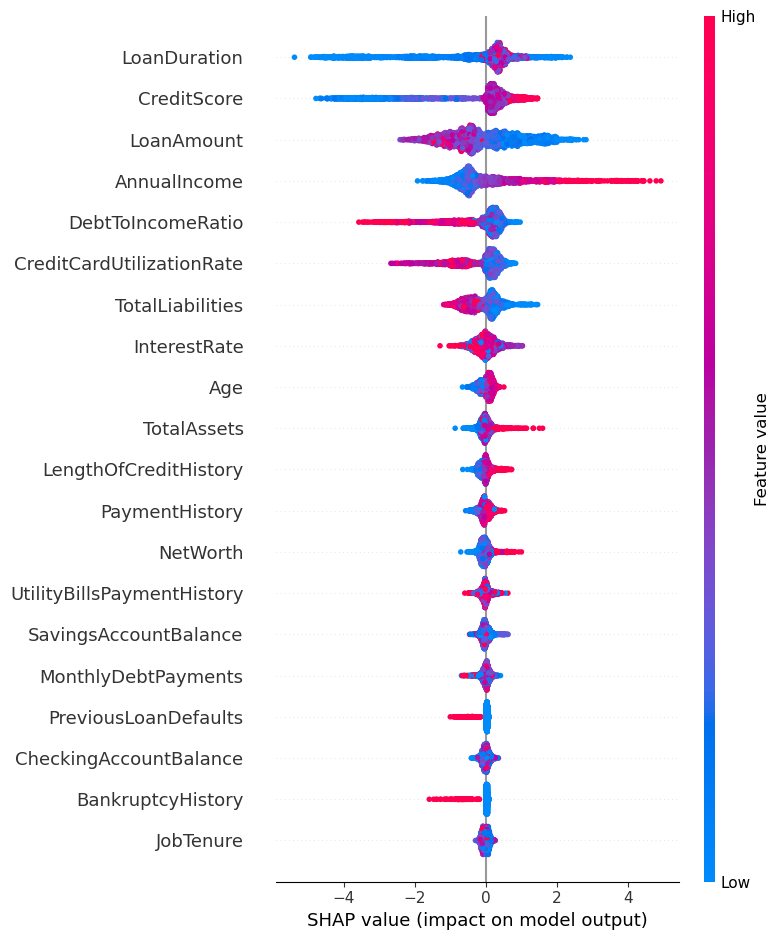

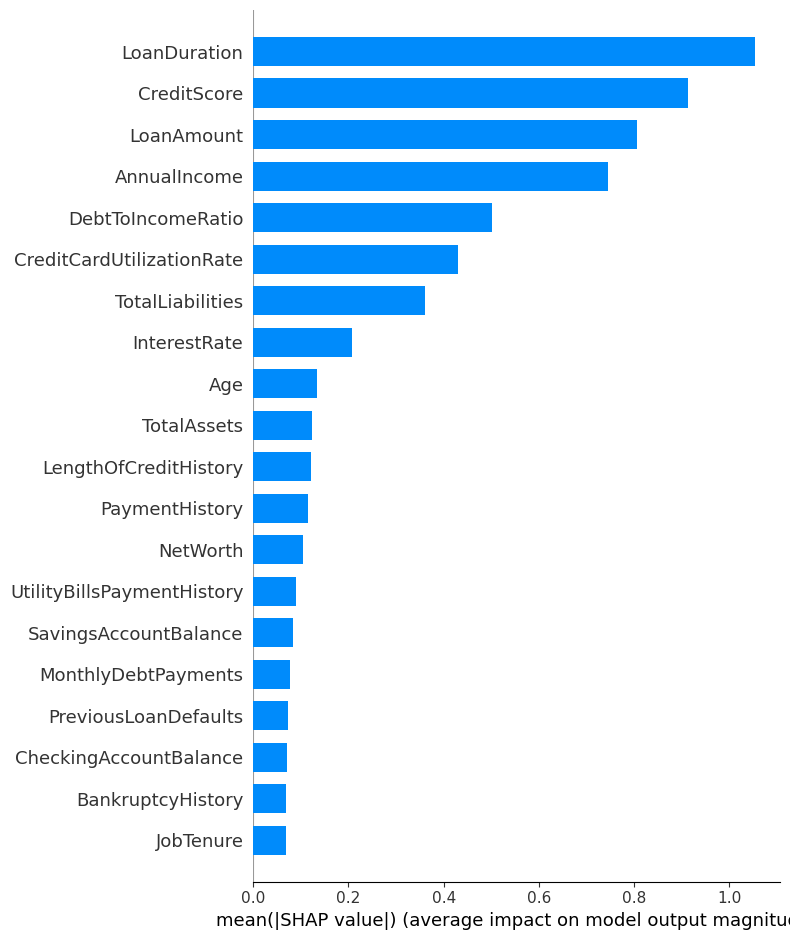

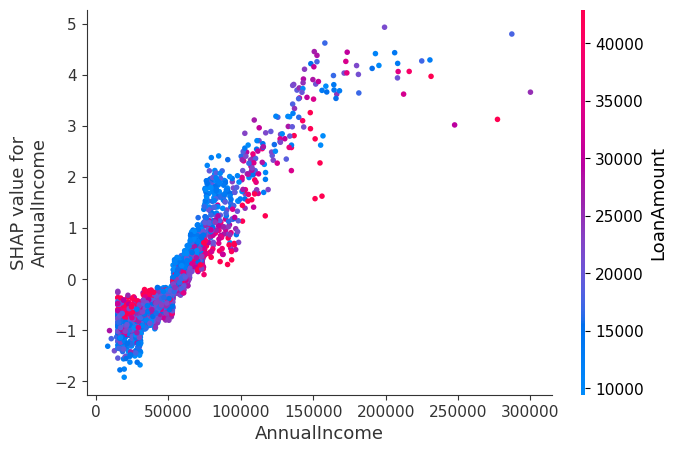

In [ ]:
#use shapley to visualize the model
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer for XGBoost
explainer = shap.TreeExplainer(best_model)

# Get SHAP values for the validation set
shap_values = explainer.shap_values(x_validation)

# 1. Summary Plot (Feature importance)
shap.summary_plot(shap_values, x_validation)

# 2. Feature Importance Bar Plot
shap.summary_plot(shap_values, x_validation, plot_type="bar")

# 3. Dependence Plot (For a specific feature, e.g., 'AnnualIncome')
shap.dependence_plot('AnnualIncome', shap_values, x_validation)



plt.show()


In [ ]:
# now that we have our final model let;s see its performance in a few test scenarios to understand in what contexts it can be used and where it cannot be used.
# for that we need to see what the range of each feature is so that we can generate test cases
import pandas as pd

df = pd.read_csv('../data/base.csv')
# Assuming 'df' is your DataFrame
# print(df.columns)
for column in df.columns:
    if df[column].dtype != 'object':
        # For numerical columns, print the range (min, max)
        print(f"Numerical column '{column}': Range({df[column].min()}, {df[column].max()})")
    else:
        # For categorical columns, print the unique values
        print(f"Categorical column '{column}': Possible options {df[column].unique()}")


Numerical column 'MonthlyDebtPayments': Range(-207, 2501)
Numerical column 'LoanAmount': Range(379.0, 129860.0)
Numerical column 'NetWorth': Range(-55261, 2106873)
Numerical column 'CreditScore': Range(300, 849)
Numerical column 'CheckingAccountBalance': Range(-2094, 52572)
Numerical column 'BankruptcyHistory': Range(0, 1)
Numerical column 'LoanDuration': Range(0.9, 120.0)
Categorical column 'EducationLevel': Possible options ['Bachelor' 'Master' 'Doctorate' 'Associate' 'High School']
Numerical column 'UtilityBillsPaymentHistory': Range(5.227368578220037e-06, 0.9999369968306518)
Numerical column 'TotalLiabilities': Range(-38765, 542689)
Categorical column 'MaritalStatus': Possible options ['Widowed' 'Single' 'Divorced' 'Married']
Numerical column 'LengthOfCreditHistory': Range(0, 29)
Numerical column 'AnnualIncome': Range(2072.0, 422480.0)
Categorical column 'HomeOwnershipStatus': Possible options ['Other' 'Own' 'Rent' 'Mortgage']
Numerical column 'PreviousLoanDefaults': Range(0, 1)
Nu

In [ ]:
import numpy as np
import pandas as pd

# Assume you have your trained model, say 'model'
# Define the feature ranges (you can replace these with the actual ranges you've provided)
np.random.seed(17)
feature_ranges = {
    'MonthlyDebtPayments': (-207, 2501),
    'LoanAmount': (379.0, 129860.0),
    'NetWorth': (-55261, 2106873),
    'CreditScore': (300, 849),
    'CheckingAccountBalance': (-2094, 52572),
    'BankruptcyHistory': (0, 1),
    'LoanDuration': (0.9, 120.0),
    'EducationLevel': ['Bachelor', 'Master', 'Doctorate', 'Associate', 'High School'],
    'UtilityBillsPaymentHistory': (5.227368578220037e-06, 0.9999369968306518),
    'TotalLiabilities': (-38765, 542689),
    'MaritalStatus': ['Widowed', 'Single', 'Divorced', 'Married'],
    'LengthOfCreditHistory': (0, 29),
    'AnnualIncome': (2072.0, 422480.0),
    'HomeOwnershipStatus': ['Other', 'Own', 'Rent', 'Mortgage'],
    'PreviousLoanDefaults': (0, 1),
    'CreditCardUtilizationRate': (0.0002016954511145, 0.999993872441393),
    'PaymentHistory': (0, 45),
    'TotalAssets': (-105468, 2131807),
    'EmploymentStatus': ['Unemployed', 'Employed', 'Self-Employed'],
    'SavingsAccountBalance': (-7460, 200089),
    'Age': (18, 80),
    'NumberOfCreditInquiries': (0, 9),
    'JobTenure': (0, 39),
    'DebtToIncomeRatio': (0.0002012715553111, 0.9995946221414752),
    # 'LoanApproved': (0, 1),  # target column, not needed for generation
    'NumberOfOpenCreditLines': (0, 14),
    'LoanPurpose': ['Other', 'Education', 'Home', 'Auto', 'Debt Consolidation'],
    'InterestRate': (0.0101166395388892, 0.4467873210539924),
    'NumberOfDependents': (0, 5)
}


good_ranges = {
    'MonthlyDebtPayments': (-207, 2501),
    'LoanAmount': (379.0, 9980.0),
    'NetWorth': (20000, 2106873),
    'CreditScore': (550, 849),
    'CheckingAccountBalance': (-2094, 52572),
    'BankruptcyHistory': (0, 1),
    'LoanDuration': (0.9, 120.0),
    'EducationLevel': ['Bachelor', 'Master', 'Doctorate', 'Associate', 'High School'],
    'UtilityBillsPaymentHistory': (5.227368578220037e-06, 0.9999369968306518),
    'TotalLiabilities': (-38765, 542689),
    'MaritalStatus': ['Widowed', 'Single', 'Divorced', 'Married'],
    'LengthOfCreditHistory': (0, 29),
    'AnnualIncome': (300072.0, 422480.0),
    'HomeOwnershipStatus': ['Other', 'Own', 'Rent', 'Mortgage'],
    'PreviousLoanDefaults': (0, 1),
    'CreditCardUtilizationRate': (0.0002016954511145, 0.999993872441393),
    'PaymentHistory': (0, 45),
    'TotalAssets': (-105468, 2131807),
    'EmploymentStatus': ['Unemployed', 'Employed', 'Self-Employed'],
    'SavingsAccountBalance': (-7460, 200089),
    'Age': (18, 70),
    'NumberOfCreditInquiries': (0, 5),
    'JobTenure': (0, 39),
    'DebtToIncomeRatio': (0.0002012715553111, 0.5995946221414752),
    # 'LoanApproved': (0, 1),  # target column, not needed for generation
    'NumberOfOpenCreditLines': (0, 14),
    'LoanPurpose': ['Other', 'Education', 'Home', 'Auto', 'Debt Consolidation'],
    'InterestRate': (0.0101166395388892, 0.4467873210539924),
    'NumberOfDependents': (0, 5)
}

# Function to generate random synthetic individuals which are 'sane' (the data makes sense)
def generate_synthetic_individuals(n=10000, range_to_consider=feature_ranges):
    individuals = []
    for _ in range(n):
        individual = {}
        for feature, value_range in range_to_consider.items():
            if isinstance(value_range, tuple):
                individual[feature] = np.random.uniform(value_range[0], value_range[1])
            elif isinstance(value_range, list):
                individual[feature] = np.random.choice(value_range)
        if individual['AnnualIncome'] > 211240 and individual['LoanAmount'] < individual['AnnualIncome']:
            individual['LoanApproved'] = 1
        if individual['DebtToIncomeRatio'] >= 0.7:
            individual['LoanApproved'] = 0
        elif individual['CreditScore'] > 600:
            individual['LoanApproved'] = 1
        elif individual['PreviousLoanDefaults'] == 1:
            individual['LoanApproved'] = 0
        elif individual['BankruptcyHistory'] == 1:
            individual['LoanApproved'] = 0
        elif individual['EmploymentStatus'] != 'Unemployed':
            individual['LoanApproved'] = 1
        elif individual['SavingsAccountBalance'] > 200089 - 200089/10:
            individual['LoanApproved'] = 0
        elif individual['NumberOfCreditInquiries'] >= 8 and individual['LengthOfCreditHistory'] <= 20:
            individual['LoanApproved'] = 0
        else: 
            continue
        individuals.append(individual)
    
    retdf =  pd.DataFrame(individuals)
    categorical_columns = []
    numerical_columns = []
    for column in retdf.columns:
        if retdf[column].dtype == 'object':
            categorical_columns.append(column)
        else:
            numerical_columns.append(column)
    encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

    encoded_categoricals = encoder.fit_transform(retdf[categorical_columns])
    encoded_categoricals_df = pd.DataFrame(encoded_categoricals.toarray(), columns=encoder.get_feature_names_out(categorical_columns))
    numericals_df = pd.DataFrame(retdf[numerical_columns], columns=numerical_columns)
    
    retdf = pd.DataFrame(pd.concat([numericals_df, encoded_categoricals_df], axis='columns'))
    return retdf


synthetic_data = generate_synthetic_individuals(1000, good_ranges)



predictions = best_model.predict(synthetic_data.drop(columns=['LoanApproved']))

# Add predictions to the synthetic data
synthetic_data['LoanApprovedPrediction'] = predictions

# Now, let's analyze the predictions based on specific criteria

cols_to_print = ['LoanApproved', 'LoanApprovedPrediction', 'AnnualIncome', 'DebtToIncomeRatio', 'CreditScore', 'EmploymentStatus', 'PreviousLoanDefaults', 'BankruptcyHistory']
def analyze_predictions(df, type1='clear'):
    # Example of analysis based on extreme values
    count = 0
    correct_count =  0
    for i, row in df.iterrows():
        if row['LoanApproved'] == row['LoanApprovedPrediction']:
            correct_count+=1
        else:
            str1 = ''
            for el, col in zip(row, df.columns):
            # for el, col in zip(row, cols_to_print):
                str1 += f'{col}: '  + str(el) + " "
            # print(str1)
        count+=1
    if type1 == 'clear':
        print(f'{correct_count}/{count} on clear points')
    elif type1 == 'ambiguous':
        print(f'{correct_count}/{count} on ambiguous points')
    pass


# Perform the analysis
analyze_predictions(synthetic_data, type1='clear')



synthetic_data = generate_synthetic_individuals(1000, feature_ranges)

predictions = best_model.predict(synthetic_data.drop(columns=['LoanApproved']))
synthetic_data['LoanApprovedPrediction'] = predictions
analyze_predictions(synthetic_data, type1='ambiguous')


940/950 on clear points
572/893 on ambiguous points


The new xgboost model is much better than the previous one that used Gaussian Naive Bayes. We get the following inferences from the model: 
- On good points i.e data points that have very good or very bad metrics, the model predicts with a very high accuracy.
- On ambiguous data points, the model seems to be confused and produces an accuracy of greater than 50 percent, but it is still quite confused.
- Overall the accuracy is greater than 80 percent which means that over 80 percent of the time, we can trust our model. 